# Lending Club Case Study

<font color='red'> This is an exploratory data analysis of a financial dataset with the intention of seeing any patterns that could be tied to a loan applicant's ability to full repay a loan </font>

In [1]:
#importing necessary libraries for data manipulation and visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None)

#ignore sns warnings

In [2]:
#ensuring i am in the correct direcotry with data file
import os

os.getcwd()

'C:\\Users\\micke\\OneDrive\\Documents\\Git_Projects\\lending_club_case_study'

#### Directory is correct

In [3]:
#loading the dataset

loan = pd.read_csv("loan.csv")
loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [4]:
#let's see the shape of our dataframe
loan.shape

(39717, 111)

39717 rows and 111 columns 
this seems odd though since the data_dictionary file mentions 115 columns

In [5]:
#let's see the basic info for each column, dtypes
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Lots of null values present

In [7]:
#there aare a significant number of columns. 
#Let's check for columns with large numbers of nulls to exclude from analysis
null = pd.DataFrame((loan.isnull().mean()*100), columns=['null_percentage']).sort_values(by='null_percentage',ascending=False)
null[null['null_percentage']>0]

,null_percentage
verification_status_joint,100.000000
annual_inc_joint,100.000000
mo_sin_old_rev_tl_op,100.000000
mo_sin_old_il_acct,100.000000
bc_util,100.000000
bc_open_to_buy,100.000000
avg_cur_bal,100.000000
acc_open_past_24mths,100.000000
inq_last_12m,100.000000
total_cu_tl,100.000000


<font color='black'> Quite a few columns have 100% null values. These fields can not contribute to analysis so they should be dropped </font>


In [8]:
#removing columns with high number of nulls
#threshold of > 90%

threshold = 0.9

for col in loan:
    if loan[col].isnull().mean() > threshold:
        loan.drop(col, axis=1, inplace=True)

        

null_updated = pd.DataFrame((loan.isnull().mean()*100), columns=['null_percentage']).sort_values(by='null_percentage',ascending=False)
null_updated[null_updated['null_percentage']>0]


,null_percentage
mths_since_last_delinq,64.662487
desc,32.580507
emp_title,6.191303
emp_length,2.706650
pub_rec_bankruptcies,1.754916
last_pymnt_d,0.178765
chargeoff_within_12_mths,0.140998
collections_12_mths_ex_med,0.140998
revol_util,0.125891
tax_liens,0.098195


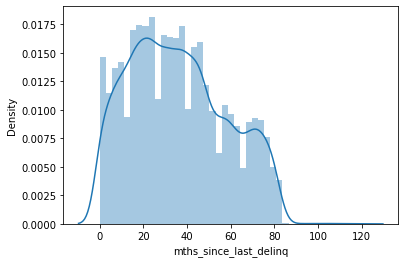

In [9]:
#checking distribution of mths_since_last_delinq

sns.distplot(loan['mths_since_last_delinq'])
plt.show()

The data is skewed to the right, we can fill in the na using the median since it is skewed BUT this field is a post approval field and therefore it may be best to simply drop this field

In [10]:
loan.drop('mths_since_last_delinq', axis=1, inplace=True)
loan.shape


(39717, 54)

In [11]:
#taking a look at desc column. If information is not pertinent to analysis will drop

loan['desc'].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>
1      Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possibl

This seems like information that would be sumarised in the purpose of the loan. Likely desc is simply the notes made by the lending club when the applicant submitted their request. The fact there are so many null values could indicate it is an optional field and purpose is the mandatory field. Will drop desc.

In [12]:
loan.drop('desc', axis=1, inplace=True)
loan.shape

(39717, 53)

In [13]:
#considering emp_title

loan['emp_title'].value_counts().head(15)

US Army                    134
Bank of America            109
IBM                         66
AT&T                        59
Kaiser Permanente           56
Wells Fargo                 54
USAF                        54
UPS                         53
US Air Force                52
Walmart                     45
Lockheed Martin             44
United States Air Force     42
State of California         42
U.S. Army                   41
Verizon Wireless            40
Name: emp_title, dtype: int64

Again there is no real standardisation here with USAF, U.S Army US ARMY, US Army all pretty much the same title but are separate values. Cleaning this field up could provide insights into defaulters BUT there are certainly many mopre possible titles and limiting a model with simply these would not be ideal. emp_title will be excluded from analysis. Dropping column

In [14]:
loan.drop('emp_title', axis=1, inplace=True)
loan.shape

(39717, 52)

In [15]:
#checking emp_length
loan['emp_length'].value_counts(dropna=False)


10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
NaN          1075
Name: emp_length, dtype: int64

1075 NaN values the field should be updated to float. <1 years should be 0 years. + years should then be removed. The NaN will be updated to 0 years since we have no employment length for these individuals. it is possible they are unemployed


In [16]:
loan['emp_length'].replace('< 1 year','0 years', inplace=True)
loan['emp_length'] = loan['emp_length'].str.rstrip('+ years').astype(np.float)
loan['emp_length'].fillna(0, inplace=True)

In [17]:
loan['emp_length'].value_counts()

10.0    8879
0.0     5658
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: emp_length, dtype: int64

In [18]:
#checking nas in pub_rec_bankruptcies
loan['pub_rec_bankruptcies'].value_counts(dropna=False)

0.0    37339
1.0     1674
NaN      697
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

Will check the distribution

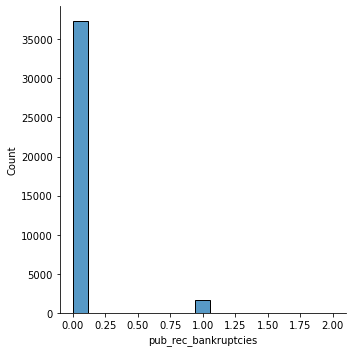

In [19]:
sns.displot(loan['pub_rec_bankruptcies'])
plt.show()

In [20]:
loan['pub_rec_bankruptcies'].median()

0.0

In [21]:
loan['pub_rec_bankruptcies'].fillna(0,inplace=True)
loan['pub_rec_bankruptcies'].value_counts(dropna=False)

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

### Drop constant features

In [22]:
def find_constant_features(dataFrame):
    const_features = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 2:
            const_features.append(column)
    return const_features

constant_features = find_constant_features(loan)
constant_features

['pymnt_plan',
 'initial_list_status',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'delinq_amnt']

In [23]:
loan['policy_code'].value_counts()

1    39717
Name: policy_code, dtype: int64

all features in constant_features only have one value in the entire column. They can not be used to segment data. They will be dropped

In [24]:
for col in constant_features:
        loan.drop(col, axis=1, inplace=True)

loan.shape

(39717, 46)

### Continued Data Cleaning and Standardisation

In [25]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1.0,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.action?loan_id=1075358,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0.0,0.0,0.0


In [26]:
#id is not necessary since we are not looking at individual loan characteristics will drop
loan.drop('id', axis=1, inplace=True)

#same of member id
loan.drop('member_id', axis=1, inplace=True)

#term should drop months and be type int
loan['term'] = loan['term'].str.rstrip(' months').astype(np.int8)

#int_rate should drop the % and be of type float
loan['int_rate']=loan['int_rate'].str.replace('%','').astype(np.float)

#the grade is included in the subgrade, there is no need for subgrade, will drop
loan.drop('sub_grade', axis=1, inplace=True)

#issue_d only valuable info is month in my opinion since we can check differences between months
#will rename column and split it
loan['issue_d']=loan['issue_d'].apply(lambda x : str(x).split('-')[0])
loan.rename(columns={'issue_d':'issue_month'})

#url is not necessary, it is just a link to the loan. will drop
loan.drop('url', axis=1, inplace = True)


#title will not be used in analysis
loan.drop('title', axis=1, inplace=True)

#zipcode while great for location is not absolutely necessary as we can use the state for this info as well. Will drop
loan.drop('zip_code', axis=1, inplace=True)


#revol_balance tells us how much is owed but not what percentage of income that value is i.e i owe\
# 50 but we don't know if that 50 is a small proportion of income or not. dropping and keepoing revol_util

loan.drop('revol_bal', axis=1, inplace=True)


In [27]:
loan.shape

(39717, 39)

In [28]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36,10.65,162.87,B,10.0,RENT,24000.0,Verified,Dec,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0.0,0.0,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,0.0,RENT,30000.0,Source Verified,Dec,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,0.0,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,Dec,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0.0,0.0,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,Dec,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0.0,0.0,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,Dec,Current,other,OR,17.94,0,Jan-96,0,15,0,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0.0,0.0,0.0


In [29]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39661.0,39717.000000,39678.0
mean,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,4.838835,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,0.0,0.042501,0.0
std,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,3.605528,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.202603,0.0
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
25%,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,2.000000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,0.0,0.000000,0.0
50%,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,4.000000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,9.000000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,0.0,2.000000,0.0


They are some columns with all 0. Will drop these

In [30]:
for col in loan.describe().columns:
    if loan[col].max() == 0:
        loan.drop(col, axis=1, inplace = True)
        
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,4.838835,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.042501
std,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,3.605528,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.202603
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,2.000000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,4.000000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,9.000000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


This analysis seeks to identify risk of default, so fields that can only be populated after default should be droped

#### Post default fields
- recoveries 
- revol_util
- out_prncp
- out_prncp_inv
- total_pymnt
- total_pymnt_inv
- total_rec_int
- total_rec_late_fee
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt


In [31]:
#removing the aforementioned columns

cols = ['recoveries','revol_util','out_prncp','out_prncp_inv','total_pymnt',
        'total_pymnt_inv','total_rec_int','total_rec_late_fee','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt']


for col in cols:
    loan.drop(col, axis=1,inplace=True)
    
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,total_rec_prncp,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,10.0,RENT,24000.0,Verified,Dec,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,9,5000.00,May-16,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,0.0,RENT,30000.0,Source Verified,Dec,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,4,456.46,Sep-13,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,Dec,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,10,2400.00,May-16,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,Dec,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,37,10000.00,Apr-16,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,Dec,Current,other,OR,17.94,0,Jan-96,0,15,0,38,2475.94,May-16,0.0


last_credit_pull_d is simply the last time a credit check was conducted by the lending club. Dropping this field as the last credit check could be before or after loan approval, without a year we can not confirm.
Additionally, total_rec_prncp would be amount paid thus far on a loan, since all these are completed loans it is going to = the loan_amount for fully paid or < for charged off. redundant field so will drop.

In [32]:
loan.drop(['last_credit_pull_d','total_rec_prncp'], axis=1, inplace=True)

In [33]:
loan.shape

(39717, 23)

#### checking duplicates

In [34]:
loan.duplicated().mean()*100

0.0

#### correlation analysis

some fields may be highly correlated and therefore should be review

In [35]:
corr = loan.corr()
index=[]
column=[]
value=[]

for i in range(len(corr.index)):
    for j in range(len(corr.index)):
        if corr.iloc[i,j] != 1:
            column.append(corr.columns[i])
            index.append(corr.index[j])
            value.append((corr.iloc[i,j]))

<AxesSubplot:>

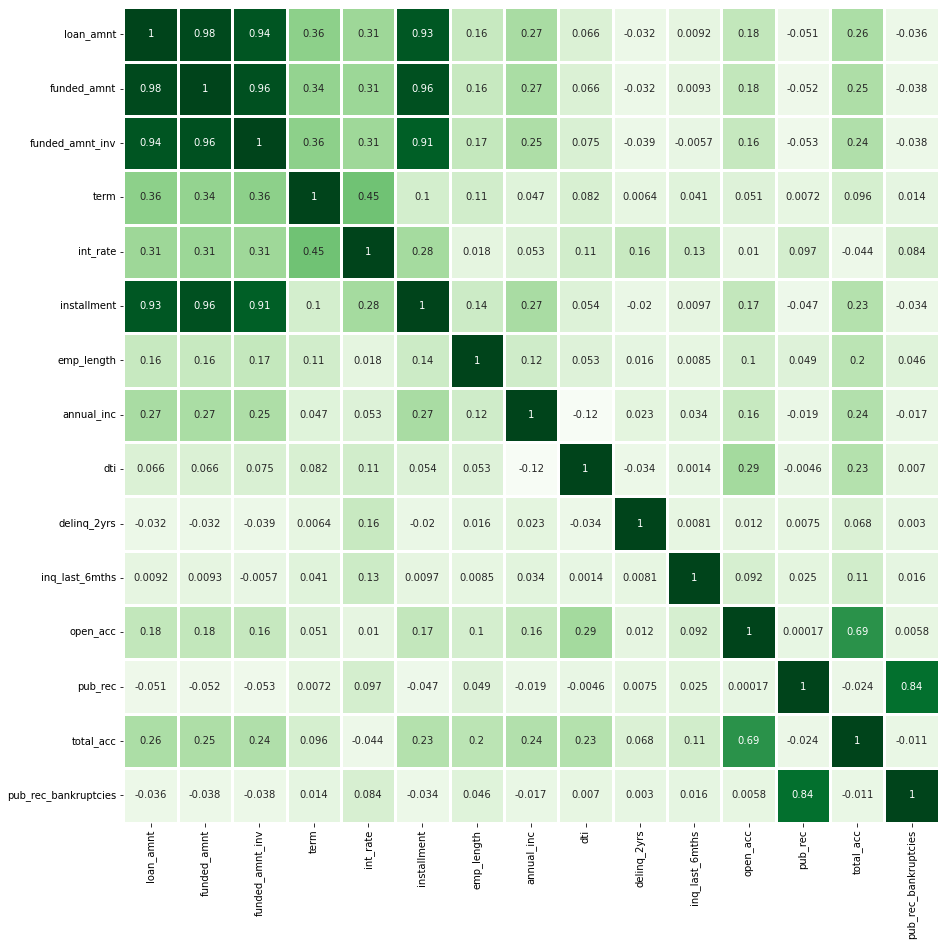

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=0, linewidths=2.5, annot = True,square=True, cmap='Greens')

There are numerous ways of deciding how highly correlated fields should be handled. However, as the goal of this analysis is simply identifying patterns in charged off vs fully paid loans, keeping loan_Amnt should suffice over funded_amnt, funded_amnt_inv and installment. As such, these fields will be dropped. In addition, pub_rec and pub_rec_bankruptcies are highly correlated and refer to similar situations, therefore I will also drop one of these. While total_acc and open_acc are not extremely highly correlated, open_acc is a subset of total_acc so I will drop open_acc

In [37]:
loan.drop(['funded_amnt','funded_amnt_inv','installment', 'pub_rec_bankruptcies','open_acc'], axis=1, inplace=True)
loan.shape

(39717, 18)

In [38]:
loan.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,pub_rec,total_acc
0,5000,36,10.65,B,10.0,RENT,24000.0,Verified,Dec,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,0,9
1,2500,60,15.27,C,0.0,RENT,30000.0,Source Verified,Dec,Charged Off,car,GA,1.00,0,Apr-99,5,0,4
2,2400,36,15.96,C,10.0,RENT,12252.0,Not Verified,Dec,Fully Paid,small_business,IL,8.72,0,Nov-01,2,0,10
3,10000,36,13.49,C,10.0,RENT,49200.0,Source Verified,Dec,Fully Paid,other,CA,20.00,0,Feb-96,1,0,37
4,3000,60,12.69,B,1.0,RENT,80000.0,Source Verified,Dec,Current,other,OR,17.94,0,Jan-96,0,0,38


One final check for null values

In [39]:
null_updated2= pd.DataFrame((loan.isnull().mean()*100), columns=['null_percentage']).sort_values(by='null_percentage',ascending=False)
null_updated2

,null_percentage
loan_amnt,0.0
term,0.0
pub_rec,0.0
inq_last_6mths,0.0
earliest_cr_line,0.0
delinq_2yrs,0.0
dti,0.0
addr_state,0.0
purpose,0.0
loan_status,0.0


### Defining the target variable

In [40]:
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

The goal is to identify charge off risk in current and future applicants which means looking at fully paid and charged off loans solely. Therefore I will be creating a dataframe which includes only those values

In [41]:
loan = loan[loan['loan_status'] != 'Current']
loan.shape

(38577, 18)

In [42]:
#dealing with the month yy column
#dates before 1969 that are in the yy format get mapped as 20yy so these should be handled as well
import datetime as dt

loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format ="%b-%y")
loan['earliest_cr_line'] = loan['earliest_cr_line'].apply(lambda x: x - dt.timedelta(days=365*100) if x > dt.datetime.now() else x)


In [43]:
loan.head(2)

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,pub_rec,total_acc
0,5000,36,10.65,B,10.0,RENT,24000.0,Verified,Dec,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,0,9
1,2500,60,15.27,C,0.0,RENT,30000.0,Source Verified,Dec,Charged Off,car,GA,1.00,0,1999-04-01,5,0,4


#### outlier review and treatment

In [44]:
loan.shape

(38577, 18)

down to 18 columns and 38K rows

#### Analysis of numeric fields

<Figure size 432x288 with 0 Axes>

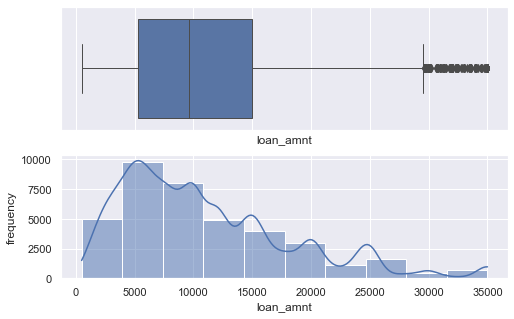

<Figure size 576x360 with 0 Axes>

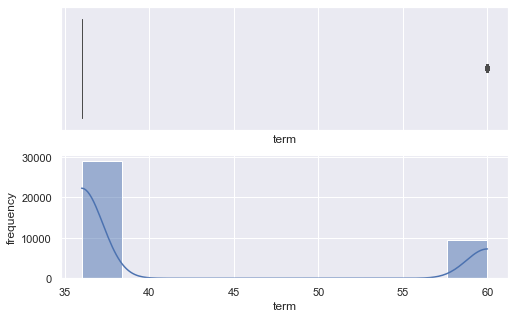

<Figure size 576x360 with 0 Axes>

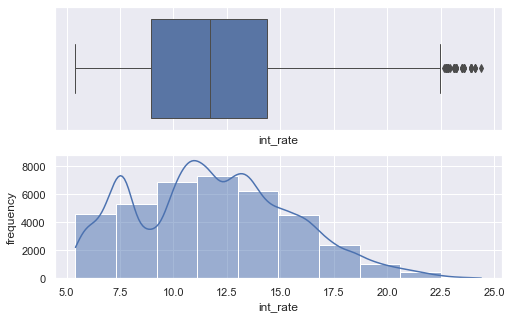

<Figure size 576x360 with 0 Axes>

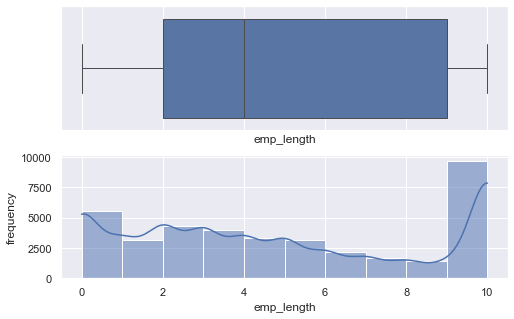

<Figure size 576x360 with 0 Axes>

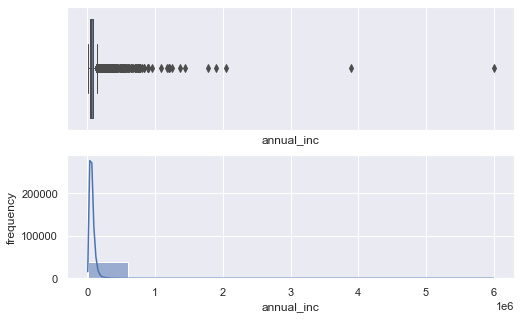

<Figure size 576x360 with 0 Axes>

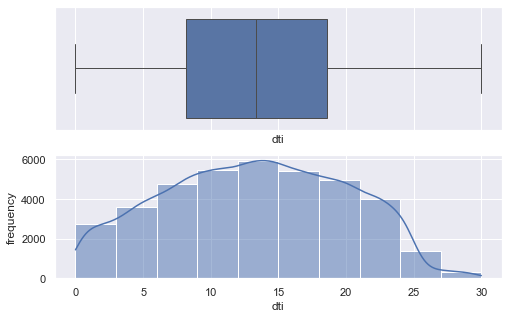

<Figure size 576x360 with 0 Axes>

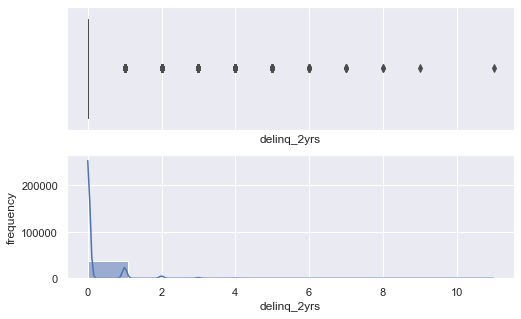

<Figure size 576x360 with 0 Axes>

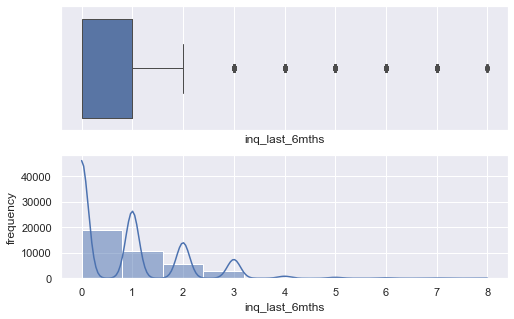

<Figure size 576x360 with 0 Axes>

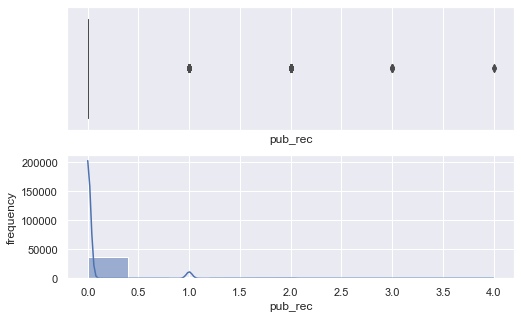

<Figure size 576x360 with 0 Axes>

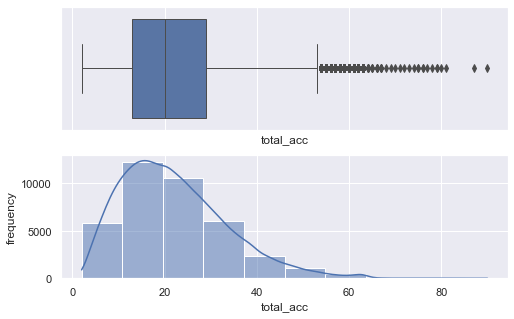

In [45]:
#building boxplots for each numeric to get an idea of the outliers

#loop through only columsn in describe() since only they can have boxplots
#loop creates pairs of box + hist for each column in loop to see distribution as well as outliers on that distrbution

for col in loan.describe().columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize": (8,5)})
    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel=col, ylabel='frequency')
    sns.boxplot(loan[col], ax=ax_box, linewidth=1.0,orient='h')
    sns.histplot(loan[col], ax=ax_hist, bins=10, kde=True)
    plt.show()
    



* will remove outliers from annual_inc then run loop again to see the distributions after this. DOing this first since they are so many outliers, which squish the boxplot

In [46]:
# will use only without the 95th quantile

#filter
filter1 = loan['annual_inc'].quantile(0.95)

#removing outliers from fields
loan = loan[loan['annual_inc'] <= filter1]

loan.shape



(36654, 18)

<Figure size 576x360 with 0 Axes>

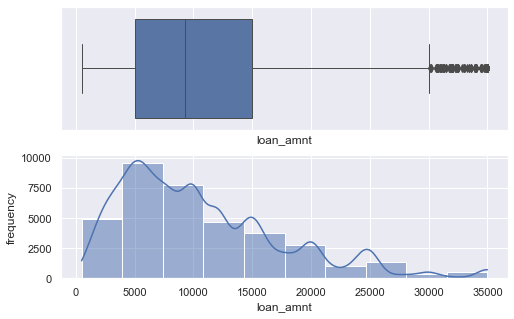

<Figure size 576x360 with 0 Axes>

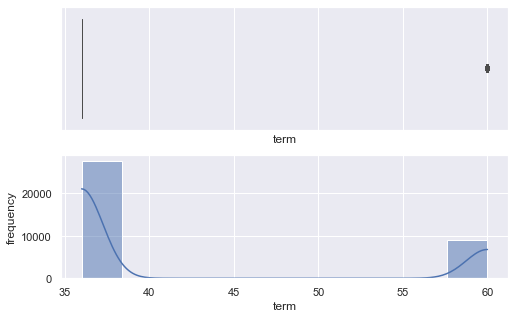

<Figure size 576x360 with 0 Axes>

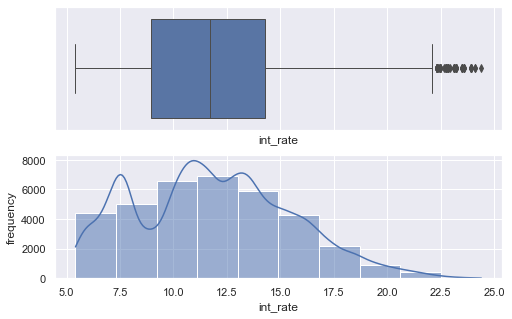

<Figure size 576x360 with 0 Axes>

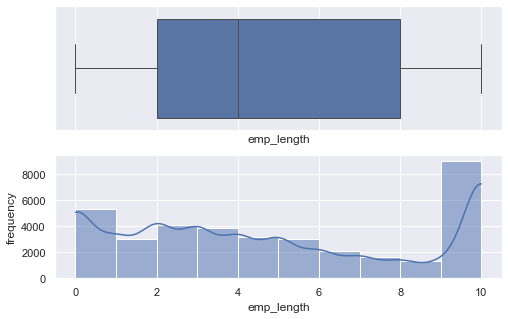

<Figure size 576x360 with 0 Axes>

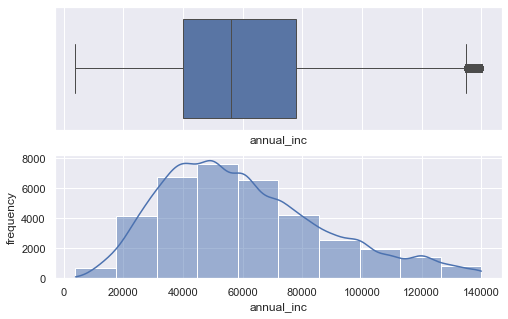

<Figure size 576x360 with 0 Axes>

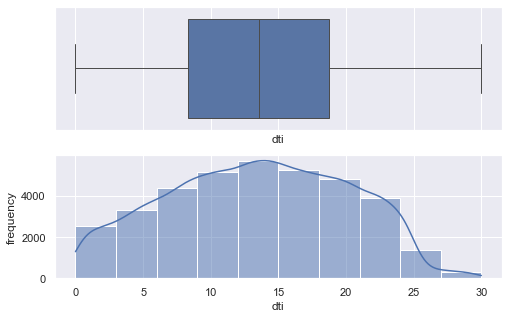

<Figure size 576x360 with 0 Axes>

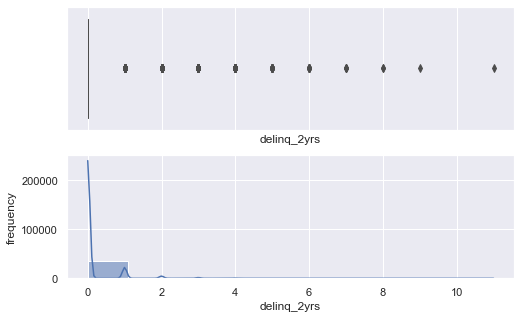

<Figure size 576x360 with 0 Axes>

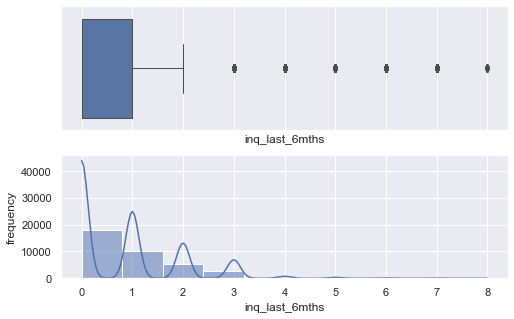

<Figure size 576x360 with 0 Axes>

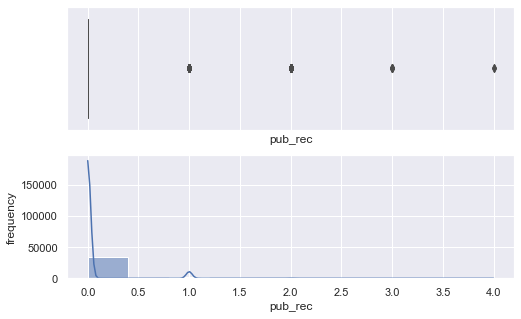

<Figure size 576x360 with 0 Axes>

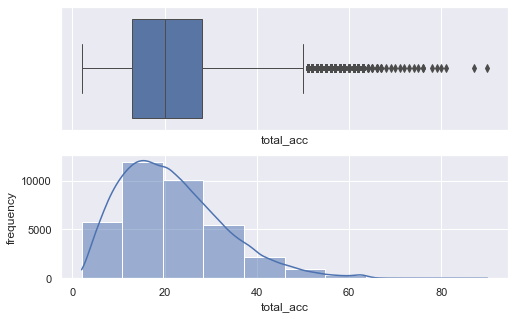

In [47]:
for col in loan.describe().columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize": (8,5)})
    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel=col, ylabel='frequency')
    sns.boxplot(loan[col], ax=ax_box, linewidth=1.0, orient='h')
    sns.histplot(loan[col], ax=ax_hist, bins=10, kde=True)
    plt.show()

pub_rec mainly has zeros. This column can be dropped if confirmed
removing some outliers from loan_amnt. Those over 30K as most values fall below this according to the histogram. will leave installment as is since we can more easily see if higher installment payments have higher default rates. 

In [48]:
loan = loan[loan['loan_amnt'] <=30000]
loan.shape

(36115, 18)

In [49]:
loan['pub_rec'].value_counts()

0    34112
1     1949
2       46
3        6
4        2
Name: pub_rec, dtype: int64

It may be best to leave them, as we can see what proportion of those with 1 or more bankruptcy have charge off. That being said, for values more than 1, I will convert those to 1. Therefore 1 stands for 1 or more derogatory remarks.
Doing this becauseof how few values for 2 and up there are, it can make visualisation difficult

In [50]:
loan['pub_rec'] = loan['pub_rec'].apply(lambda x : x if x <= 1 else 1)
loan['pub_rec'].value_counts()

0    34112
1     2003
Name: pub_rec, dtype: int64

<Figure size 576x360 with 0 Axes>

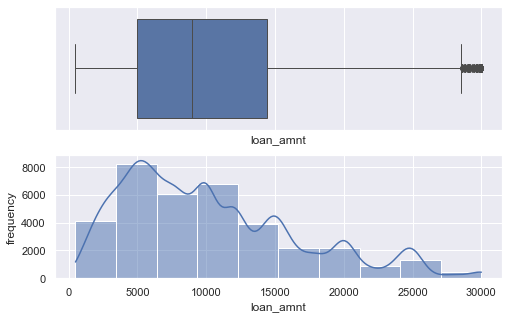

<Figure size 576x360 with 0 Axes>

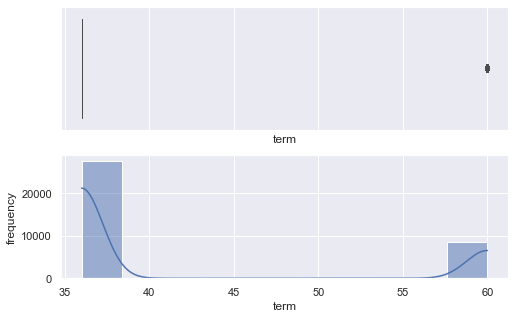

<Figure size 576x360 with 0 Axes>

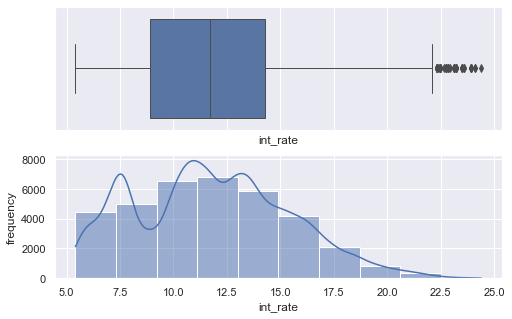

<Figure size 576x360 with 0 Axes>

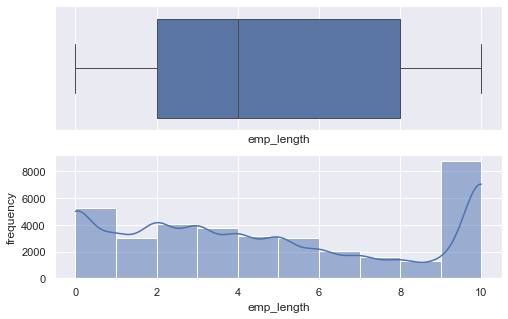

<Figure size 576x360 with 0 Axes>

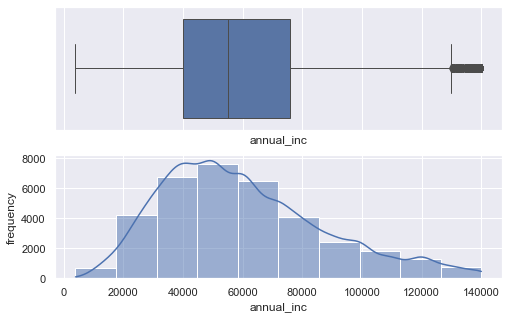

<Figure size 576x360 with 0 Axes>

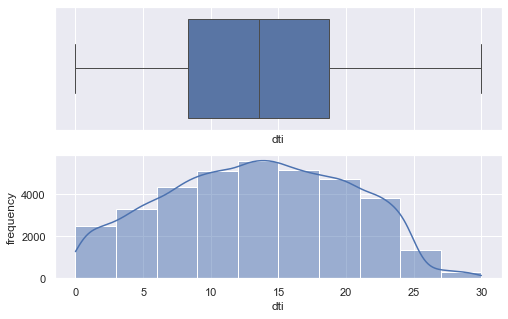

<Figure size 576x360 with 0 Axes>

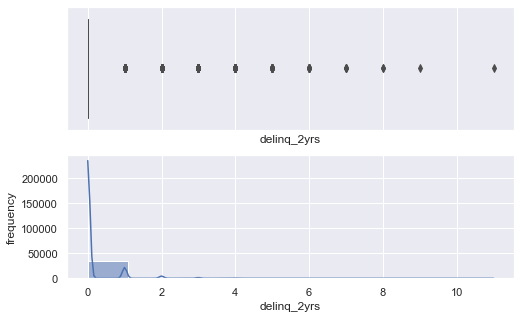

<Figure size 576x360 with 0 Axes>

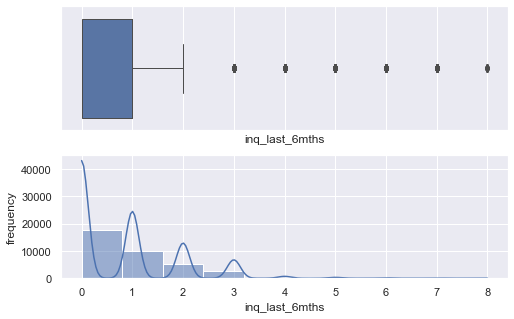

<Figure size 576x360 with 0 Axes>

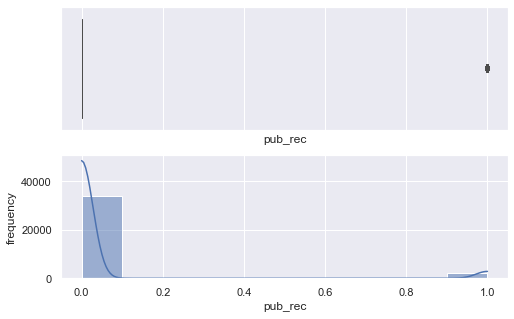

<Figure size 576x360 with 0 Axes>

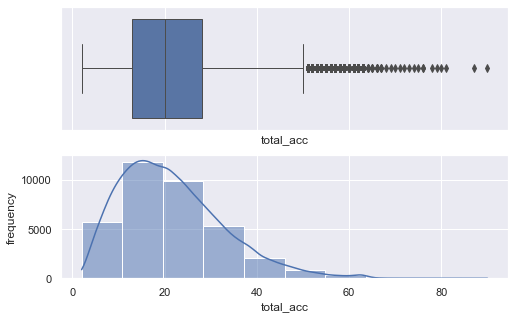

In [51]:
#visualise once more
for col in loan.describe().columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize": (8,5)})
    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel=col, ylabel='frequency')
    sns.boxplot(loan[col], ax=ax_box, linewidth=1.0, orient='h')
    sns.histplot(loan[col], ax=ax_hist, bins=10, kde=True)
    plt.show()

Before beginning further analysis income should be split into groups as well as interest rates and total_acc to make analysis easier of these fields

In [52]:
#describing to get an idea of the ranges 

loan[['annual_inc','int_rate','total_acc']].describe()


,annual_inc,int_rate,total_acc
count,36115.000000,36115.000000,36115.000000
mean,60366.782590,11.829440,21.545397
std,27530.697583,3.630671,11.212096
min,4000.000000,5.420000,2.000000
25%,40000.000000,8.900000,13.000000
50%,55000.000000,11.710000,20.000000
75%,76000.000000,14.270000,28.000000
max,140004.000000,24.400000,90.000000


- income starts at 4K to 140K. If we choose 4 bins and set the upper limit to 144K we get splits of 35
  4k-39K, 39K-74K, 74K-109K, 109K-144K
- interest rate starts at 5.42 to 24.4 - min of 5 and max of 25 then 5%-10%, 10%-15%, 15%-20%, 20%-25%
- total_acc 2-90 min of 2 and max 90. using 4 bins of 22 each. 2-24, 24-46, 46-68, 68-90

In [53]:
#making the groups
income_bins = [4000,39000,74000,109000,144000]
income_labels =['4K-39K','39K-74K','74K-109K','109K-144K']
loan['annual_class'] = pd.cut(loan['annual_inc'], bins=income_bins, include_lowest=True, labels=income_labels)

int_bins = [5,10,15,20,25]
int_labels = ['5%-10%','10%-15%','15%-20%','20%-25%']
loan['interest_class'] = pd.cut(loan['int_rate'], bins=int_bins, include_lowest=True, labels=int_labels)

total_bins = [2,24,46,68,90]
total_labels =['2-24','24-46','46-68','68-90']
loan['total_acc_class'] = pd.cut(loan['total_acc'], bins=total_bins, include_lowest=True, labels=total_labels)


loan.head(10)



,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,pub_rec,total_acc,annual_class,interest_class,total_acc_class
0,5000,36,10.65,B,10.0,RENT,24000.0,Verified,Dec,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,0,9,4K-39K,10%-15%,2-24
1,2500,60,15.27,C,0.0,RENT,30000.0,Source Verified,Dec,Charged Off,car,GA,1.00,0,1999-04-01,5,0,4,4K-39K,15%-20%,2-24
2,2400,36,15.96,C,10.0,RENT,12252.0,Not Verified,Dec,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,0,10,4K-39K,15%-20%,2-24
3,10000,36,13.49,C,10.0,RENT,49200.0,Source Verified,Dec,Fully Paid,other,CA,20.00,0,1996-02-01,1,0,37,39K-74K,10%-15%,24-46
5,5000,36,7.90,A,3.0,RENT,36000.0,Source Verified,Dec,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,0,12,4K-39K,5%-10%,2-24
6,7000,60,15.96,C,8.0,RENT,47004.0,Not Verified,Dec,Fully Paid,debt_consolidation,NC,23.51,0,2005-07-01,1,0,11,39K-74K,15%-20%,2-24
7,3000,36,18.64,E,9.0,RENT,48000.0,Source Verified,Dec,Fully Paid,car,CA,5.35,0,2007-01-01,2,0,4,39K-74K,15%-20%,2-24
8,5600,60,21.28,F,4.0,OWN,40000.0,Source Verified,Dec,Charged Off,small_business,CA,5.55,0,2004-04-01,2,0,13,39K-74K,20%-25%,2-24
9,5375,60,12.69,B,0.0,RENT,15000.0,Verified,Dec,Charged Off,other,TX,18.08,0,2004-09-01,0,0,3,4K-39K,10%-15%,2-24
10,6500,60,14.65,C,5.0,OWN,72000.0,Not Verified,Dec,Fully Paid,debt_consolidation,AZ,16.12,0,1998-01-01,2,0,23,39K-74K,10%-15%,2-24


### Working with categorical fields 

#### Number of Defaulters and Fully Paid

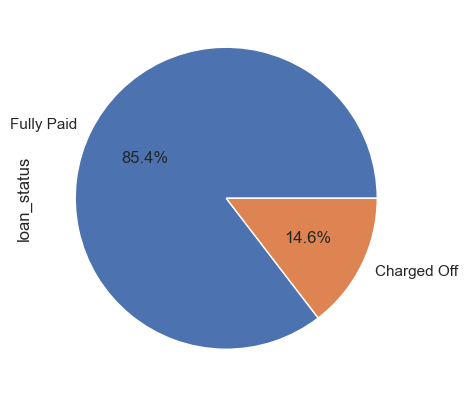

In [54]:
#quick view at the number of defaulters
plt.rcParams['figure.dpi'] = 100 #high resolution
loan['loan_status'].value_counts().plot(kind='pie', legend=False, autopct='%1.1f%%')
plt.show()

14.6% of loans ended in default out of 36K loans. 
This is a small proportion of the dataset, making it quite unbalanced but as this is EDA and not model building, there is no need to re-balance the dataset at this time

#### Price of default

In [55]:
loan_amnt_by_status = loan[['loan_status','loan_amnt']].groupby(by='loan_status').sum()
loan_amnt_by_status

,loan_amnt
loan_status,
Charged Off,58689050
Fully Paid,314281575


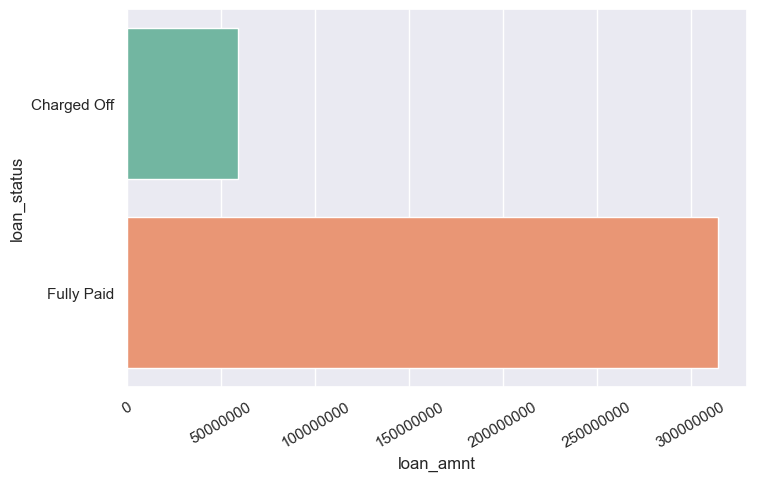

In [107]:
#how much do defaulters cost us
plt.rcParams['figure.dpi'] = 100 #high resolution
sns.barplot(data=loan_amnt_by_status, y=loan_amnt_by_status.index, x='loan_amnt', orient='h', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=30)

plt.show()

charged off loans cost 58 Million Dollars while fully paid were 314 Million dollars. This was 15.6% of overall loan amounts distributed
Again charged off loans accounted for a small overall cost but 58 million is still a substantial sum of money to potentially lose

In [57]:
# order results high to low
purpose_order = loan['purpose'].value_counts().index

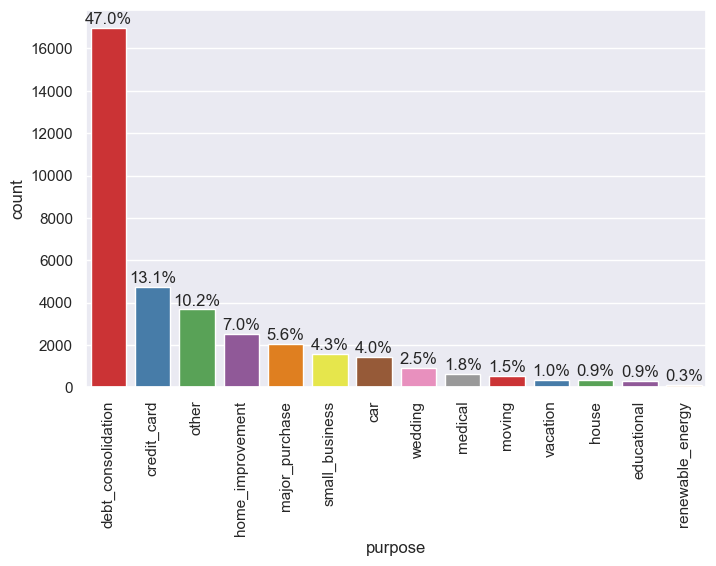

In [58]:
#what are the most common reasons for getting a loan
plt.rcParams['figure.dpi'] = 100 #high resolution
ax = sns.countplot(data=loan, x='purpose', palette='Set1', order = purpose_order)
for bars in ax.containers:
    for p in bars.patches:
       
        percentage = f'{100 * p.get_height() / loan.shape[0]:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
plt.xticks(rotation=90)
plt.show()

It can also be seen that debt consolidation, credit card debt, other and home improvement and major purchase account for >80% of loans



#### Term of Length with respect to Loan Status

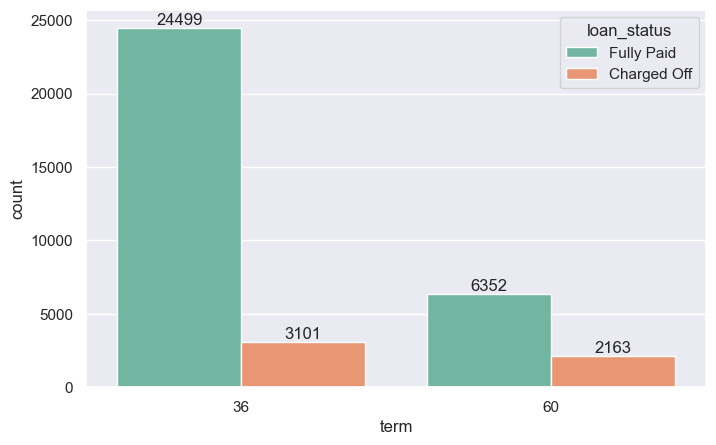

In [59]:
plt.rcParams['figure.dpi'] = 100 #high resolution
ax = sns.countplot(data=loan, x='term',hue='loan_status', palette ='Set2')
for container in ax.containers:
    ax.bar_label(container)
plt.show()


Clients seeking longer term loans are more likely to default.

#### Interest Rate vs Term by Loan Status

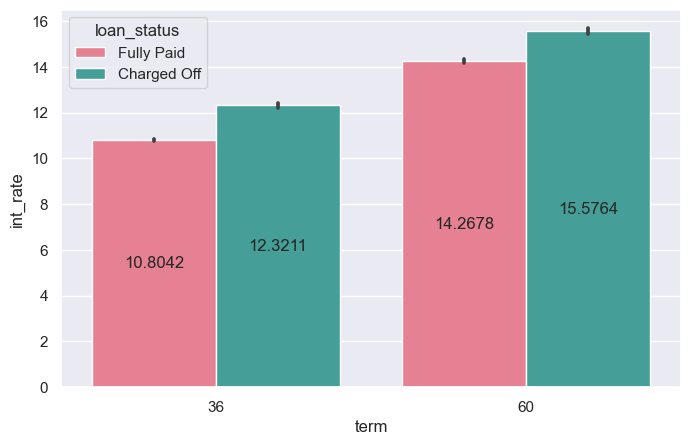

In [60]:
plt.rcParams['figure.dpi'] = 100 #high resolution
ax = sns.barplot(data=loan, x='term',y='int_rate',hue='loan_status', palette ='husl')
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.show()


For a loan of 36 months, if the assigned interest rate exceeds 11% then this increases the chance of default
For a loan of 60 months, if the assigned interest rate exceeds 14% then this increases the chance of default

#### Loan Grade by Loan Status

In [61]:
#adding perc from comment https://stackoverflow.com/a/67076347 on stackoverflow 
# by user myles - https://stackoverflow.com/users/4852724/myles
# dated Apr 13, 2021 at 13:58
# some only aware of how to add 

def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

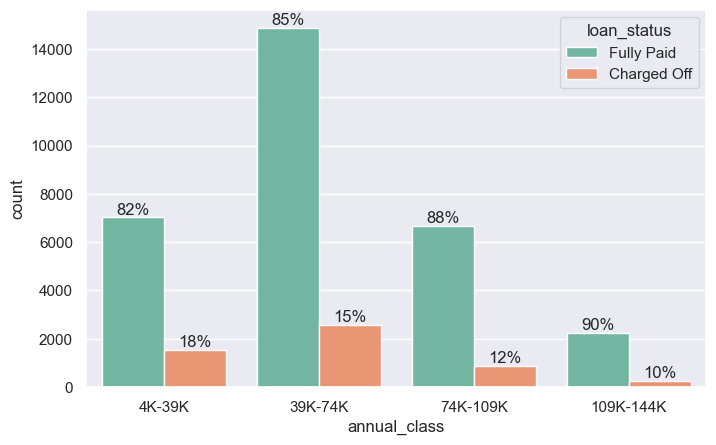

In [62]:
#which income_class defaults more
plt.rcParams['figure.dpi'] = 100 #high resolution
ax = sns.countplot(data=loan, x='annual_class',hue='loan_status', palette ='Set2')
barPerc(loan, 'annual_class',ax)
plt.show()



as income increases the percentage  of defaults in an income class decreases

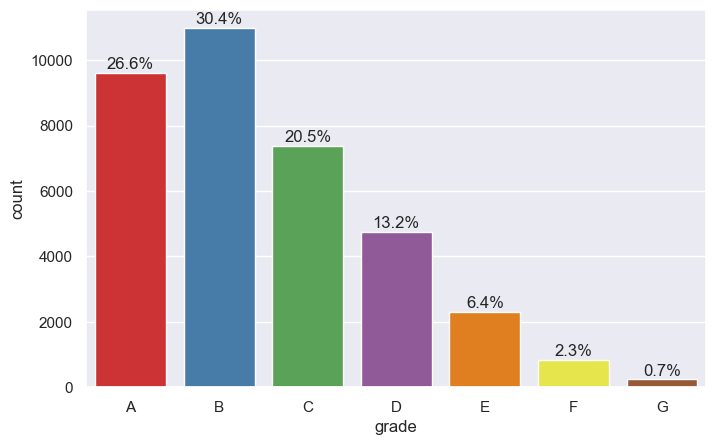

In [63]:
plt.rcParams['figure.dpi'] = 100 #high resolution
ax = sns.countplot(data=loan, x='grade', palette='Set1', order = ['A','B','C','D','E','F','G'])
for bars in ax.containers:
    for p in bars.patches:
        
        percentage = f'{100 * p.get_height() / loan.shape[0]:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

nearly 80% of loans are Grade A, B or C. Indicating most borrowers are graded highly with >50% getting grades A and B. This could indicate most applicants are somewhat reputatable.

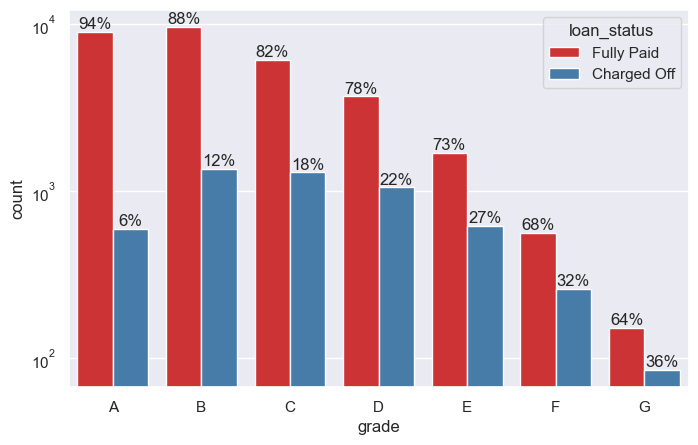

In [64]:
#taking a look at grade and default

plt.rcParams['figure.dpi'] = 100 #high resolution
ax = sns.countplot(data=loan, x='grade', hue='loan_status', palette='Set1', order = ['A','B','C','D','E','F','G'])
ax.set(yscale="log")
barPerc(loan,'grade',ax)
plt.show()

As the grade of the loan moved from A to G, the percentage of defaulters to fully paid increases, indicating that clients with lower grade loans are riskier. 
Investors are less likely to be repaid by lower grade loan applicants

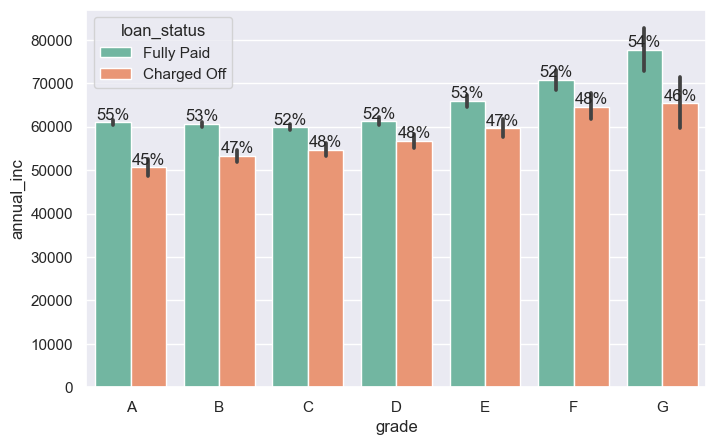

In [65]:
#grade and income interact
plt.rcParams['figure.dpi'] = 100 #high resolution
ax = sns.barplot(data=loan, x='grade',y='annual_inc',hue='loan_status', palette ='Set2', order = ['A','B','C','D','E','F','G'])
barPerc(loan,'grade',ax)
plt.show()


There does not appear to be a significant difference in percentage of defaults when income is taken into consideration. 

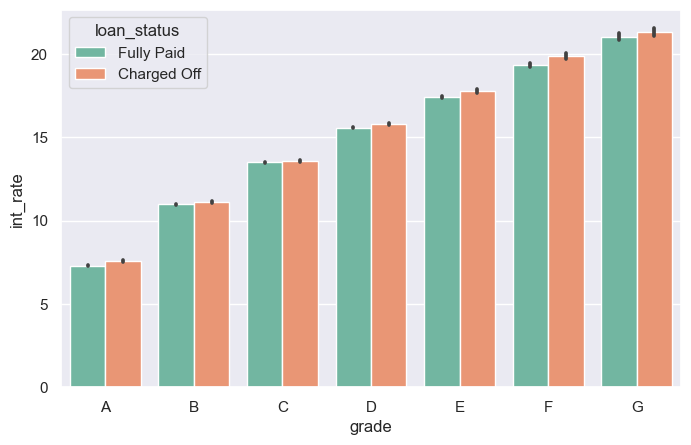

In [66]:
plt.rcParams['figure.dpi'] = 100 #high resolution
ax = sns.barplot(data=loan, x='grade',y='int_rate',hue='loan_status', palette ='Set2', order = ['A','B','C','D','E','F','G'])
plt.show()

Regardless of grade and interest rate repayment of loans and default are not significantly different. Thus one is not more important than the other, both grade and interest rate have impact on the possibility of default

### Loan Amount and interactions with other variables 

In [67]:
loan['loan_amnt'].describe()

count    36115.000000
mean     10327.305136
std       6467.821666
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14400.000000
max      30000.000000
Name: loan_amnt, dtype: float64

Minimum of 500 and max of 30000

500,6400,12300,18200,24100,30000

5 buckets - micro, small, medium, large, very large

In [68]:
amnt_bins = [500,5400,12300,18200,24100,30000]
amnt_labels =['0.5K-6.4K','6.4K-12.3K','12.3K-18.2K','18.2K-24.1K','24.1K-30K']
loan['loan_amnt_class'] = pd.cut(loan['loan_amnt'], bins=amnt_bins, include_lowest=True, labels=amnt_labels)


loan.head(10)



,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,pub_rec,total_acc,annual_class,interest_class,total_acc_class,loan_amnt_class
0,5000,36,10.65,B,10.0,RENT,24000.0,Verified,Dec,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,0,9,4K-39K,10%-15%,2-24,0.5K-6.4K
1,2500,60,15.27,C,0.0,RENT,30000.0,Source Verified,Dec,Charged Off,car,GA,1.00,0,1999-04-01,5,0,4,4K-39K,15%-20%,2-24,0.5K-6.4K
2,2400,36,15.96,C,10.0,RENT,12252.0,Not Verified,Dec,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,0,10,4K-39K,15%-20%,2-24,0.5K-6.4K
3,10000,36,13.49,C,10.0,RENT,49200.0,Source Verified,Dec,Fully Paid,other,CA,20.00,0,1996-02-01,1,0,37,39K-74K,10%-15%,24-46,6.4K-12.3K
5,5000,36,7.90,A,3.0,RENT,36000.0,Source Verified,Dec,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,0,12,4K-39K,5%-10%,2-24,0.5K-6.4K
6,7000,60,15.96,C,8.0,RENT,47004.0,Not Verified,Dec,Fully Paid,debt_consolidation,NC,23.51,0,2005-07-01,1,0,11,39K-74K,15%-20%,2-24,6.4K-12.3K
7,3000,36,18.64,E,9.0,RENT,48000.0,Source Verified,Dec,Fully Paid,car,CA,5.35,0,2007-01-01,2,0,4,39K-74K,15%-20%,2-24,0.5K-6.4K
8,5600,60,21.28,F,4.0,OWN,40000.0,Source Verified,Dec,Charged Off,small_business,CA,5.55,0,2004-04-01,2,0,13,39K-74K,20%-25%,2-24,6.4K-12.3K
9,5375,60,12.69,B,0.0,RENT,15000.0,Verified,Dec,Charged Off,other,TX,18.08,0,2004-09-01,0,0,3,4K-39K,10%-15%,2-24,0.5K-6.4K
10,6500,60,14.65,C,5.0,OWN,72000.0,Not Verified,Dec,Fully Paid,debt_consolidation,AZ,16.12,0,1998-01-01,2,0,23,39K-74K,10%-15%,2-24,6.4K-12.3K


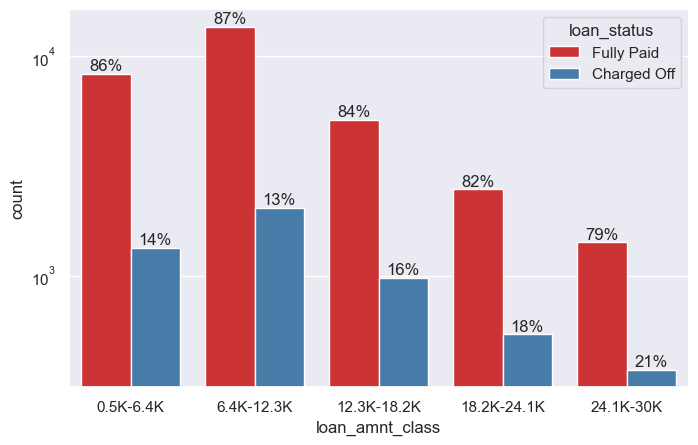

In [69]:
plt.rcParams['figure.dpi'] = 100 #high resolution
ax = sns.countplot(data=loan, x='loan_amnt_class',hue='loan_status', palette ='Set1', order = amnt_labels)
ax.set(yscale='log')
barPerc(loan,'loan_amnt_class',ax)
plt.show()

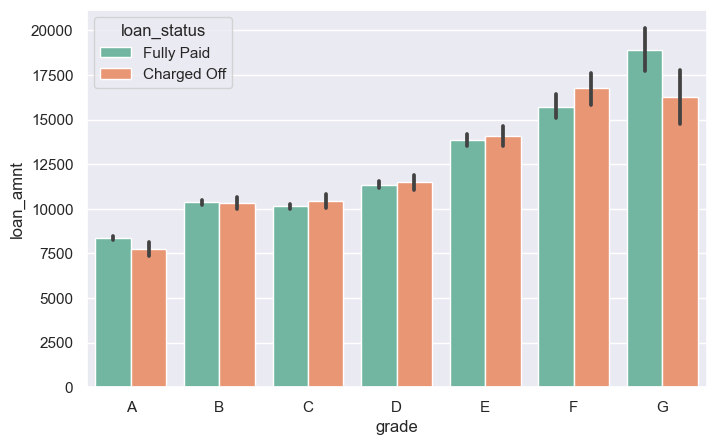

In [70]:
plt.rcParams['figure.dpi'] = 100 #high resolution
sns.barplot(data=loan, y='loan_amnt', x = 'grade',hue='loan_status', palette ='Set2', order = ['A','B','C','D','E','F','G'])

plt.show()

Clients requesting larger sums of money are more likely to have a charge off. 
Clients wanting to borrow >12.3K have a higher default rate than those below.
400 to 6400 defaulted 14% of the time but 24K and heigher defaulted 21% of the time

loan amounts of more than 15.5K and graded F are more likely to default than other loan amounts and grades.

conclusion, the more the borrower requests, the greater the risk of default especially on lower grade loans

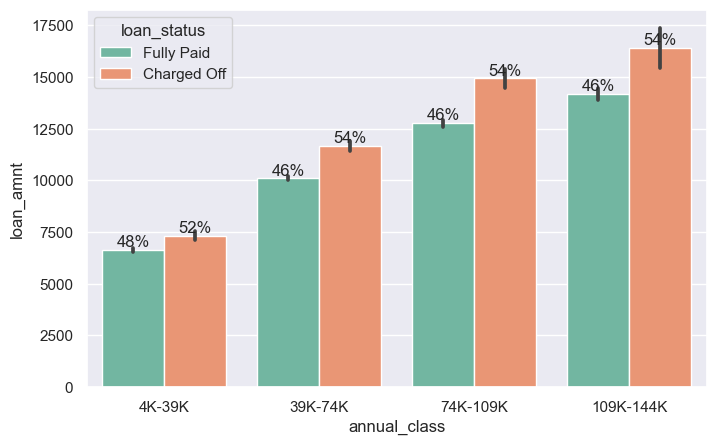

In [71]:
plt.rcParams['figure.dpi'] = 100 #high resolution
ax = sns.barplot(data=loan, x='annual_class',y='loan_amnt',hue='loan_status', palette ='Set2', order = income_labels)
#ax.set(yscale='log')
barPerc(loan,'annual_class',ax)
plt.show()

Again regardless of income class, if the client requests a larger loan their default risk increases

In [72]:
#filters for fully paid and charged off
filter2 = loan[loan['loan_status']=='Fully Paid']
filter3 = loan[loan['loan_status']!='Fully Paid']

#### Employment length and the rate of default

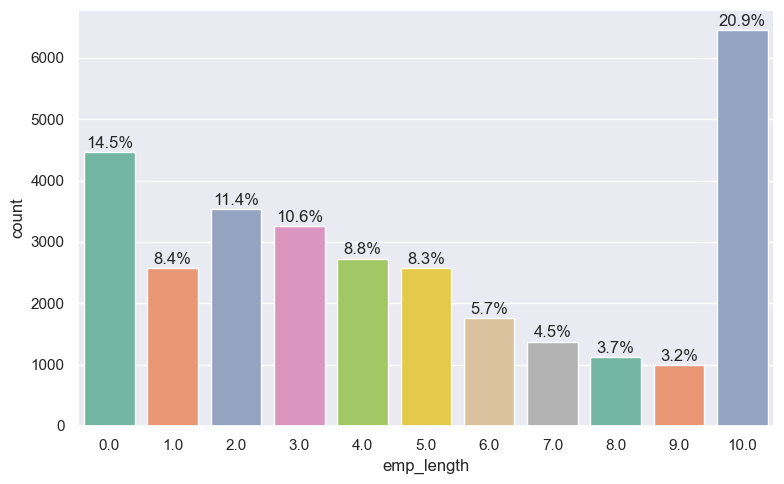

In [73]:
#checking employment length


plt.rcParams['figure.dpi'] = 100 #high resolution

ax = sns.countplot(data=filter2, x='emp_length',palette ='Set2')
for bars in ax.containers:
    for p in bars.patches:
        
        percentage = f'{100 * p.get_height() / filter2.shape[0]:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

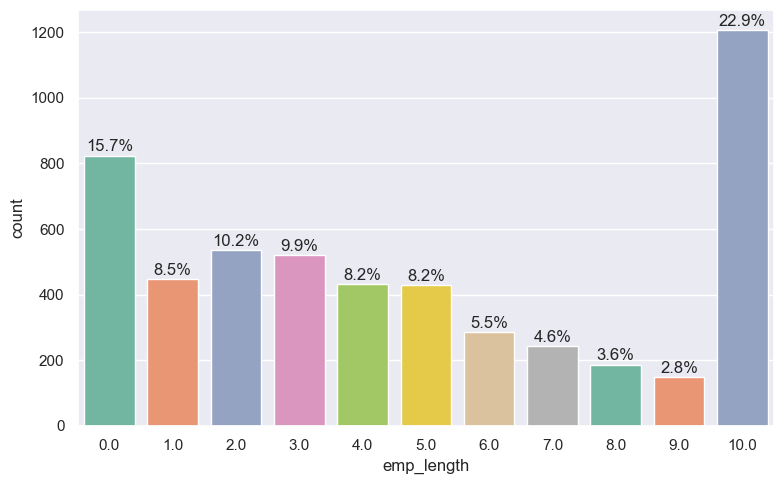

In [74]:
plt.rcParams['figure.dpi'] = 100 #high resolution

ax = sns.countplot(data=filter3, x='emp_length',palette ='Set2')
for bars in ax.containers:
    for p in bars.patches:
        
        percentage = f'{100 * p.get_height() / filter3.shape[0]:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

There are two noticeable peaks in employment length, 0 years and 10 or more years. 
This seems to simply indicate that a plurality of applicants have 0 years of employment or 10+ years of employment. In fact, between these two values as length of employment increases, the number of loans being applied for decreases. 
While it does not tell us if longer or short employment lead to more defaults, it could be hinting at differences in loan purpose.

In [75]:
#pivot table of above data using median

round(loan.pivot_table(index=loan['emp_length'].astype(int), columns='loan_status', values='loan_amnt', aggfunc=np.median),2)

loan_status,Charged Off,Fully Paid
emp_length,,
0,7200,7200
1,8500,8000
2,8400,8000
3,9250,8950
4,9600,9200
5,10000,9000
6,10000,9600
7,10800,9600
8,10625,9500


As seen in the pivot table, regardless of length of employment, defaulters tend to request larger sums of money compared to the median value for the fully paid group.
That being said as employment length increases so do the request loan amounts regardless of status

#### State and the Rate of default

In [76]:
#creating a pivot table of state and loan status
#remvoing states with very low charge off as there is not enough
#data to make a concrete conclusion
#also choosing states with more than 15% charge off

tmp = loan.pivot_table(index='addr_state', columns='loan_status',values='annual_inc',  aggfunc='count')
tmp['Overall_Default_%'] = (tmp['Charged Off']/(tmp['Fully Paid']+tmp['Charged Off']))*100
tmp.sort_values(by=['Overall_Default_%','Charged Off','Fully Paid'], inplace=True, ascending=False)
tmp_over_15 = tmp[(tmp['Charged Off']> 5) & (tmp['Overall_Default_%'] >= 15)]
tmp_over_15

loan_status,Charged Off,Fully Paid,Overall_Default_%
addr_state,,,
NV,98.0,351.0,21.826281
SD,12.0,50.0,19.354839
AK,13.0,55.0,19.117647
FL,474.0,2142.0,18.119266
HI,28.0,130.0,17.721519
MO,109.0,527.0,17.138365
NM,30.0,146.0,17.045455
OR,70.0,357.0,16.393443
CA,1048.0,5420.0,16.202845


States of 'NV', 'SD', 'AK', 'FL', 'HI', 'MO', 'NM', 'OR', 'CA', 'NJ', 'GA', 'MD','WA', 'NC', 'NH' have the highest rates of default with 21% of NV loans ending in default.

In [77]:
states_order = loan['addr_state'].value_counts().sort_index().index

<Figure size 3000x3000 with 0 Axes>

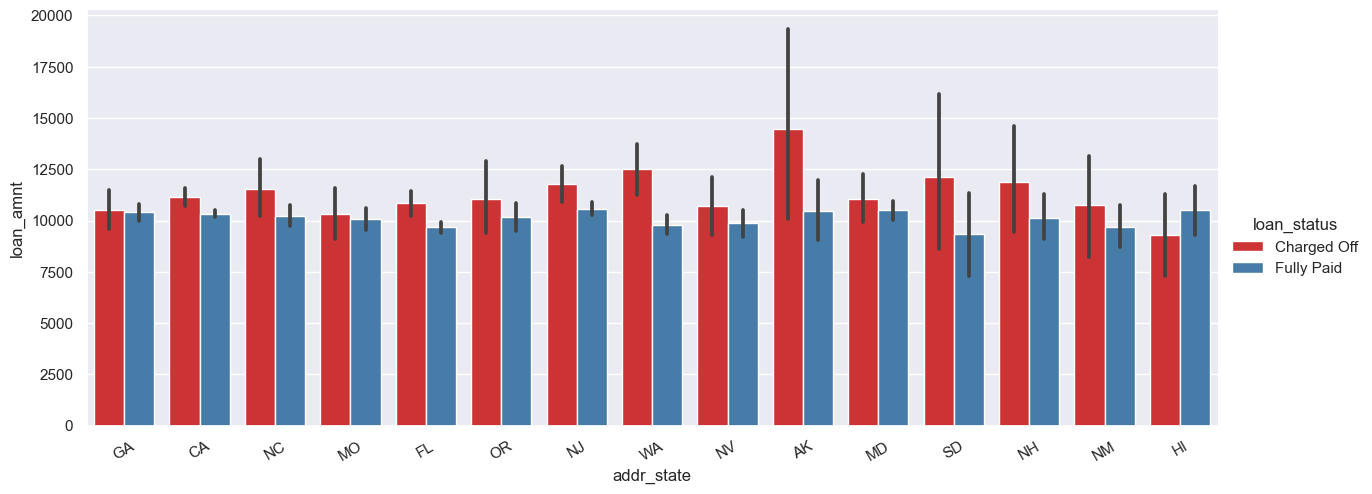

In [78]:

plt.rcParams['figure.dpi'] = 100 #high resolution

plt.figure(figsize=(30,30))
sns.catplot(data=loan[loan['addr_state'].isin(tmp_over_15.index)], y='loan_amnt', x='addr_state', hue='loan_status',
            palette ='Set1',kind="bar", aspect = 2.5)
plt.xticks(rotation=30)
plt.show()

Applicants from WA, NV, AK, SD, NH, NM requesting loans above 9.5K have a much higher rate of default that others within these 15 high default states. Oddly, in HI, higher loan amounts are more often repaid than lower amounts. 

Special care should be taken when applicants are addressed in any of the following states but increased scrutiny should be applied to those in WA, NV, AK, SD, NH, NM

#### Home onwership and income classes and their impact on default

In [79]:
loan['home_ownership'].value_counts()

RENT        17889
MORTGAGE    15311
OWN          2819
OTHER          93
NONE            3
Name: home_ownership, dtype: int64

None is undefined in the data dictionary, will exclude it in analysis below

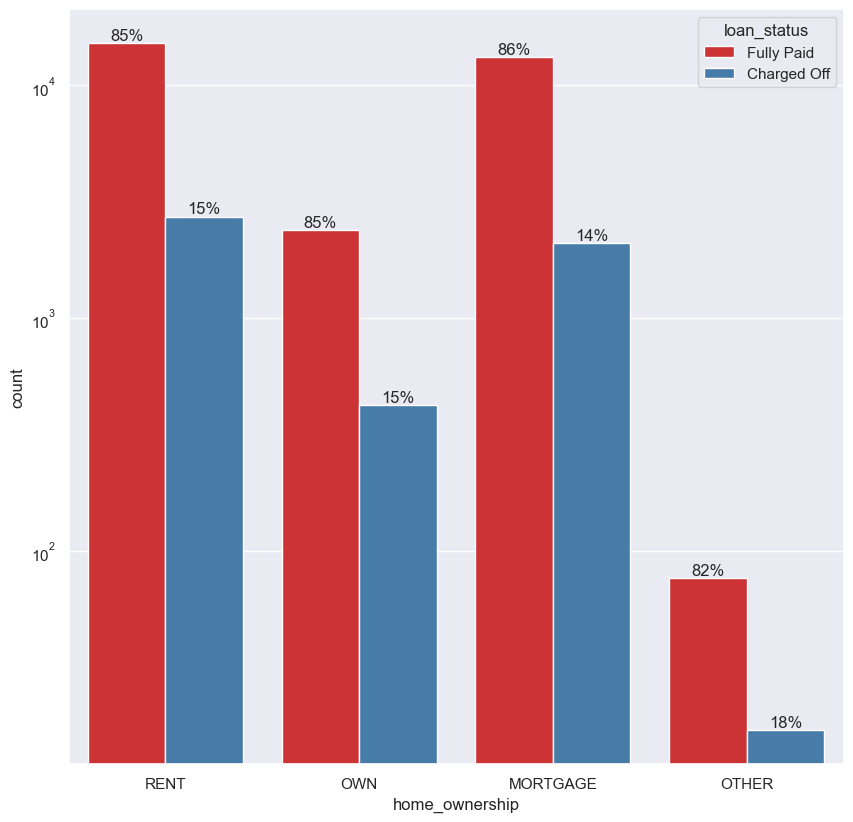

In [80]:
plt.rcParams['figure.dpi'] = 100 #high resolution

plt.figure(figsize=(10,10))
ax = sns.countplot(data=loan[loan['home_ownership'] != 'NONE'], x='home_ownership', hue='loan_status', palette='Set1')
ax.set(yscale='log')
barPerc(loan[loan['home_ownership'] != 'NONE'], 'home_ownership',ax)
plt.show()

Other defaults 18% of the time in this dataset, but it should be noted that other only accounts for 93 of 36K records, therefore there is more volatility in this measure. The true amount will only be understood from a larger dataset. That being said, other does seem to show a trend toward less repayment compared to applicants with a fixed address.

This could hint at Other being a more risky borrower than mortgage, own and rent

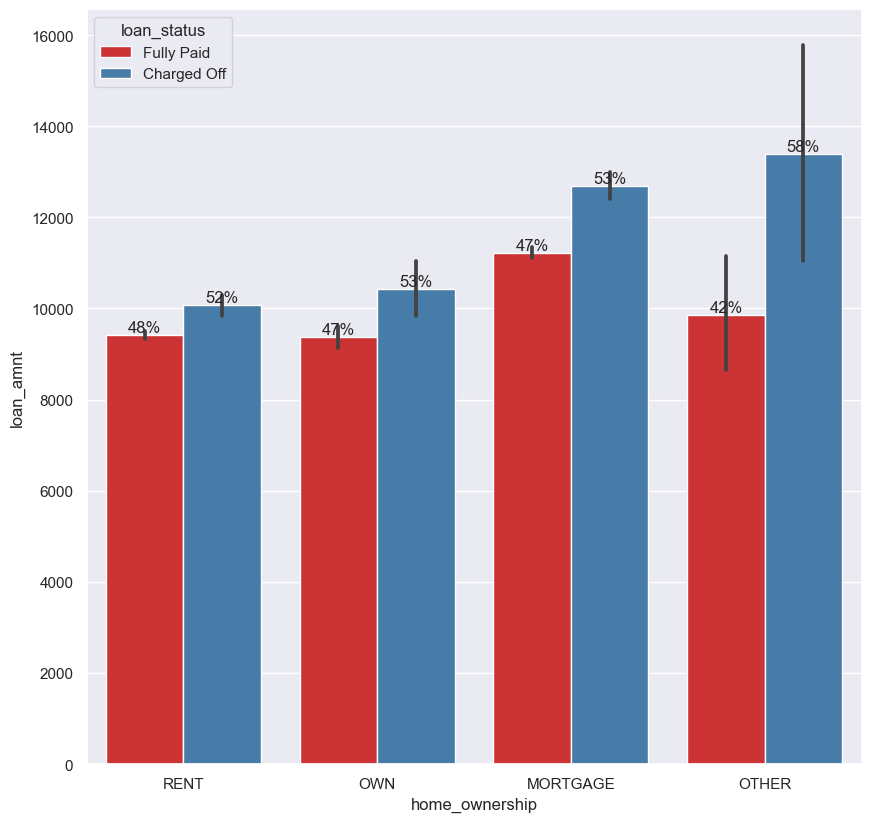

In [81]:
plt.rcParams['figure.dpi'] = 100 #high resolution
 
    
plt.figure(figsize=(10,10))
ax = sns.barplot(data=loan[loan['home_ownership'] != 'NONE'], x='home_ownership',y='loan_amnt', hue='loan_status',palette ='Set1')
barPerc(loan[loan['home_ownership'] != 'NONE'], 'home_ownership',ax)
plt.show()

Those of class other that repay in full tend to request amounts of below 10K, this is in ling with rent and own, with mortgage borrowers tending toward higher loan amounts. 
With that being said, Other with a loan amount above 10K run a higher risk of default.
Again this shows that higher loan amounts result in more defaults with homeownership - Other increasing this risk further.

#### Earliest line credit date and how it related to loan status

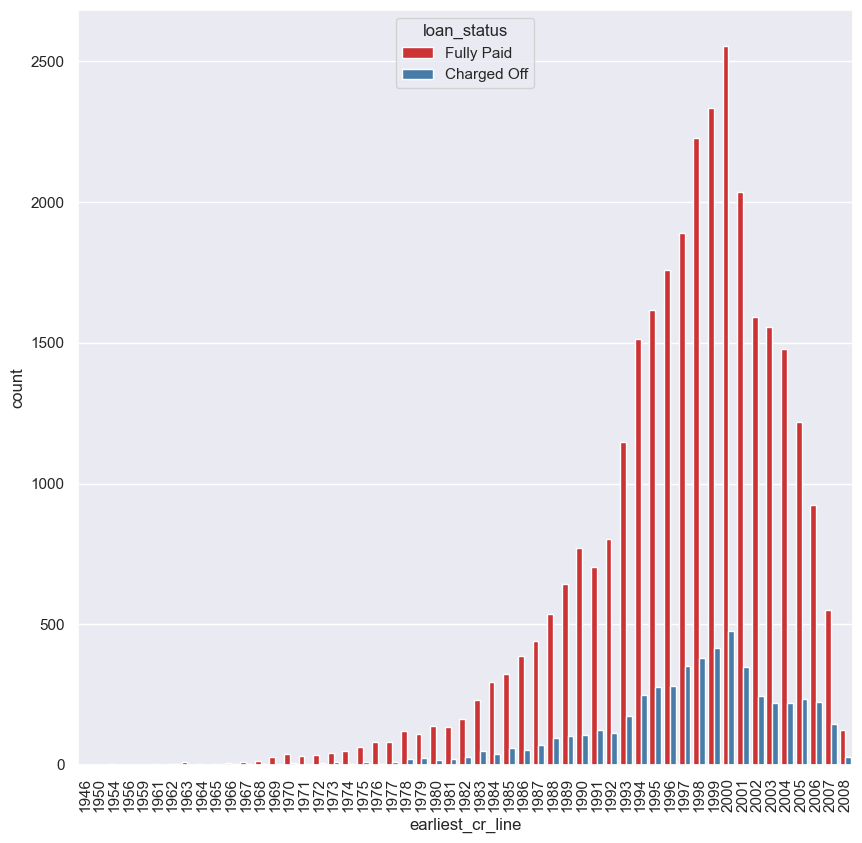

In [82]:
#does the length of time an applicant has been applying for credit affect how much they borrow


plt.rcParams['figure.dpi'] = 100 #high resolution
plt.figure(figsize=(10,10))
sns.countplot(data=loan, x=loan['earliest_cr_line'].dt.year, hue='loan_status', palette='Set1')

plt.xticks(rotation=90)
plt.show()


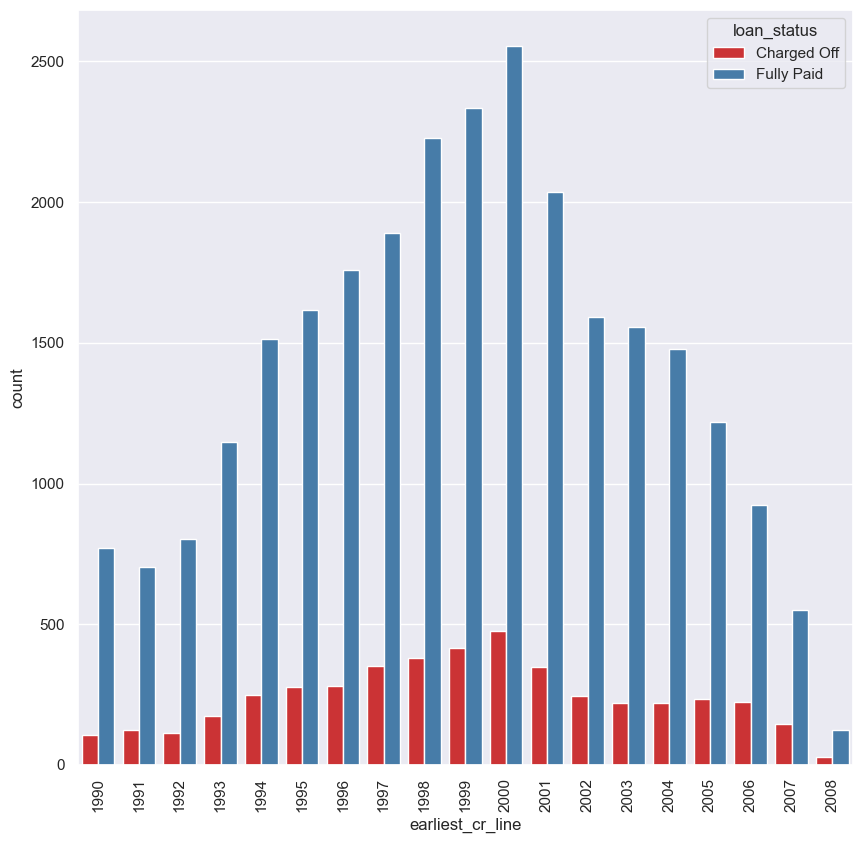

In [83]:
#taking a closer look from 1990 onward

loan_1990 = loan[loan['earliest_cr_line'].dt.year >= 1990]

plt.figure(figsize=(10,10))
sns.countplot(data=loan_1990, x=loan_1990['earliest_cr_line'].dt.year, hue='loan_status', palette='Set1')
plt.xticks(rotation=90)
plt.show()


There does not seem to be a link between the earliest line of credit and default. In fact as the number of fully paid loans increases so do the number of defaults. This is expected as there are more loans available per year and thus more can default but the percentage of default did not necessarily change

#### Bankruptcies and loan status

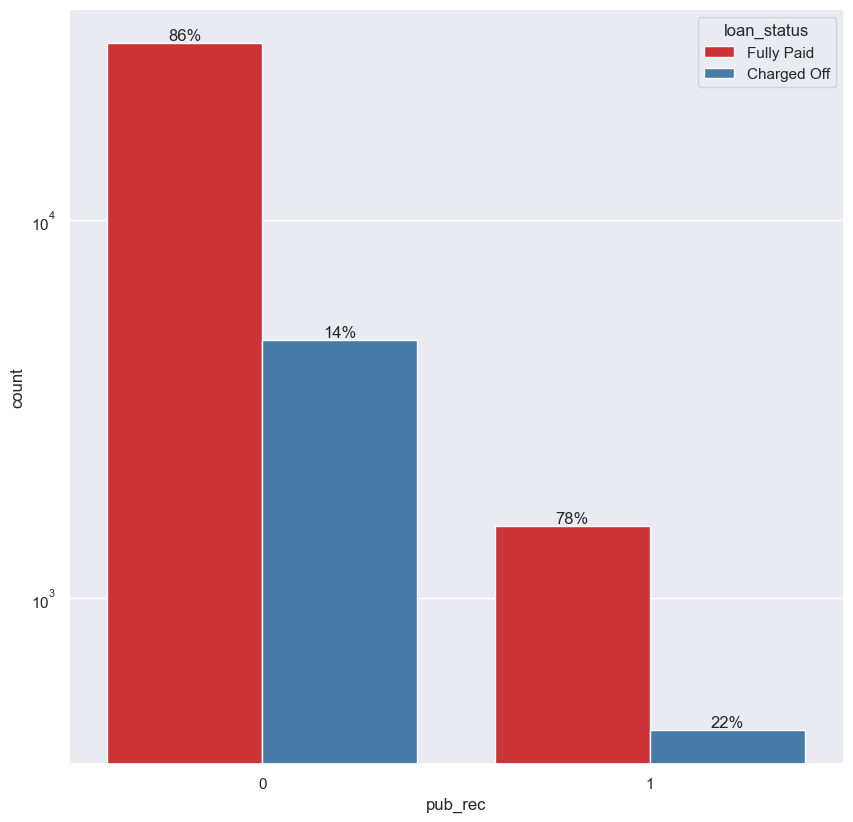

In [84]:
#bankrupcies and how they affect loan status

plt.figure(figsize=(10,10))
ax = sns.countplot(data=loan, x='pub_rec', hue='loan_status', palette='Set1')
ax.set(yscale="log")
barPerc(loan,'pub_rec',ax)
plt.show()


As the number of derogatory notes on a record increase so too does the probability of default. 22% of those with a one or more derogatory notes defaulted while only 14% did for zero.

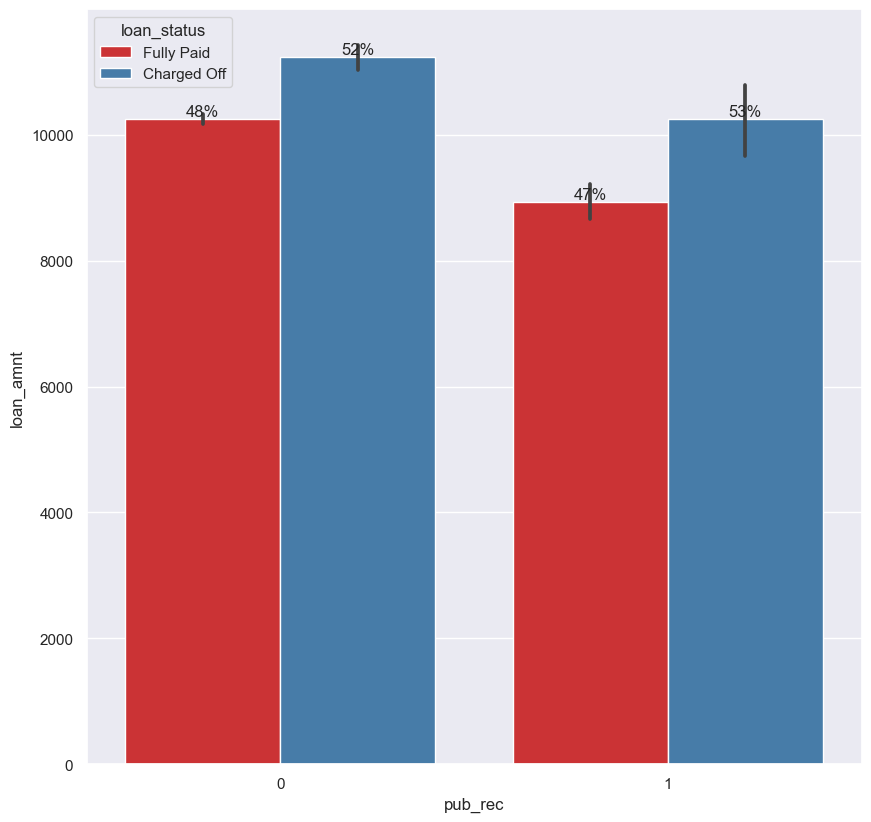

In [85]:
plt.rcParams['figure.dpi'] = 100 #high resolution
 
    
plt.figure(figsize=(10,10))
ax = sns.barplot(data=loan, x='pub_rec',y='loan_amnt', hue='loan_status',palette ='Set1')
barPerc(loan, 'pub_rec',ax)
plt.show()

This with 0 derogatory notes tend to request larger sums for loans with the larger the sum the more likely the default. Of note is those with 1 or more tend to request lower amounts BUT still default on these lower amounts at the same rate as those with 0. Accounts with any derogatory statement requesting amounts above 9K are a risky investment while those with 0 requesting more than 10.2K are risky

#### Number of Accounts and how it related to loan status

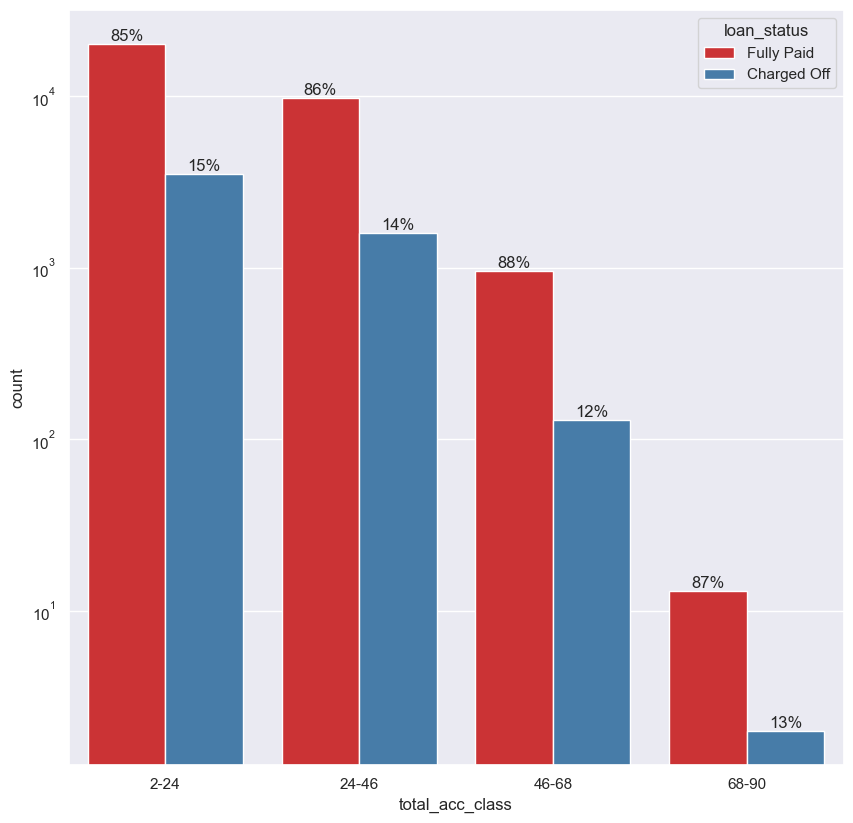

In [86]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data=loan, x='total_acc_class', hue='loan_status', palette='Set1')
ax.set(yscale='log')
barPerc(loan,'total_acc_class',ax)
plt.show()

Having many accounts alone does not immediately indicate an applicant is at risk of default as the ratio of paid to default stays relatively the same for each bucket

<Figure size 1000x1000 with 0 Axes>

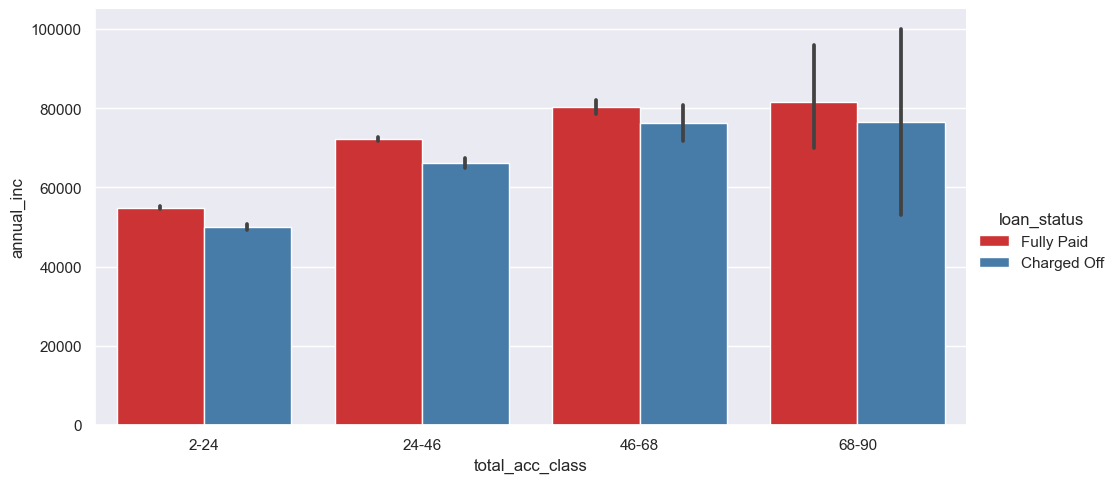

In [87]:

plt.figure(figsize=(10,10))
sns.catplot(data = loan, y='annual_inc', x='total_acc_class', hue='loan_status', kind='bar', palette='Set1',aspect = 2)

plt.show()

clients with less income tend to have fewer accounts. 
Additionally, regardless of the number of accounts, the clients that fully paid their loans back had higher income.
Therefore in considering the number of accounts, the annual income should be given a closer look.
- 2-24 acc > 50K = less default
- 24-46 acc > 65K = less default
- 46-68 acc > 75K = less default
- 68-90 acc > 80k = less default

<Figure size 1000x1000 with 0 Axes>

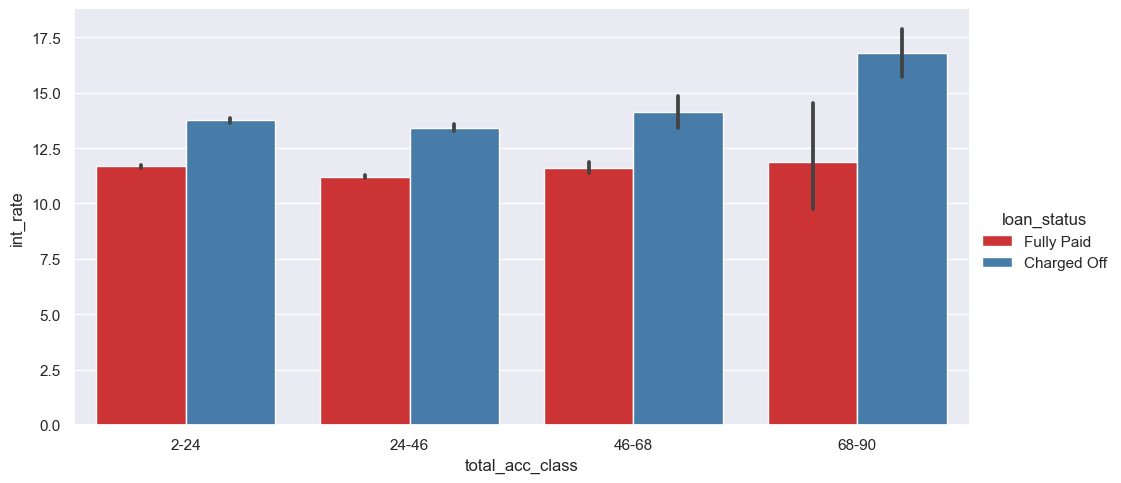

In [88]:
plt.figure(figsize=(10,10))
sns.catplot(data = loan, y='int_rate', x='total_acc_class', hue='loan_status', kind='bar', palette='Set1',aspect = 2)

plt.show()

As the number of accounts and interest increases so does the chance of a default. Clients with 24+ accounts and an interest rate below 12.5% defaulted less often than those with higher rates. Again indicating a higher interest rate loan has a higher default rate

In [89]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'pub_rec', 'total_acc',
       'annual_class', 'interest_class', 'total_acc_class', 'loan_amnt_class'],
      dtype='object')

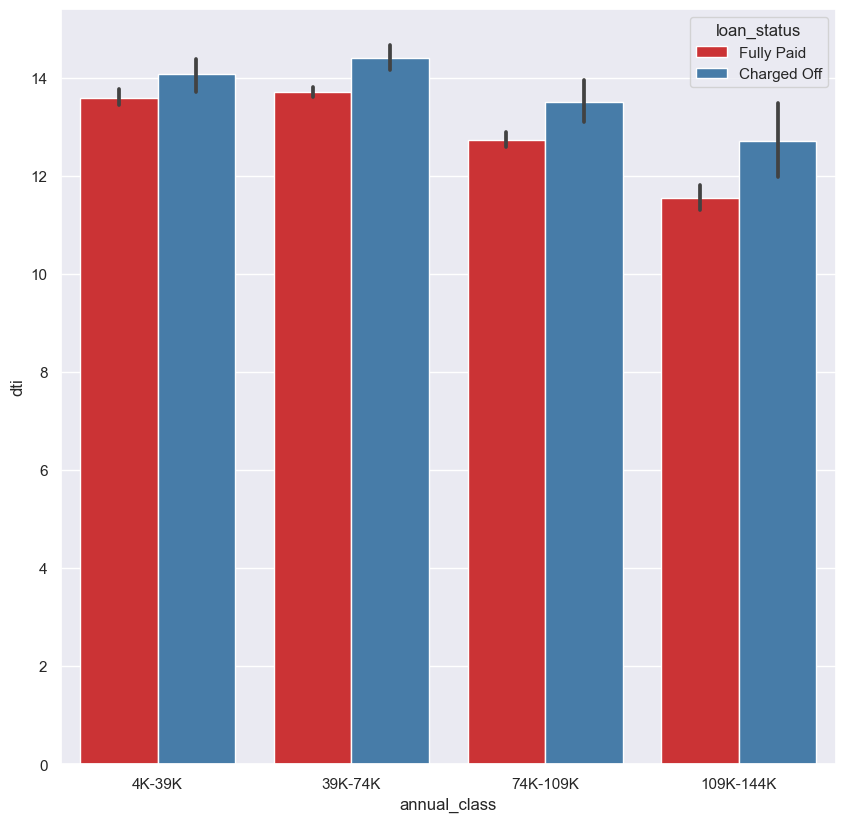

In [90]:
plt.figure(figsize=(10,10))
sns.barplot(data = loan, y='dti', x='annual_class', hue='loan_status', palette='Set1')

plt.show()

The debt to income ratio is a measure of how much one pays in debt each month versus how much they make monthly.

Understanding this, it would appear that a higher DTI results in more default. Will bucket this field to get a better idea

In [91]:
loan.dti.describe()

count    36115.000000
mean        13.430549
std          6.662977
min          0.000000
25%          8.330000
50%         13.550000
75%         18.700000
max         29.990000
Name: dti, dtype: float64

In [92]:
dti_bins = [0,5,10,15,20,25,30]
dti_labels =['0-5','5-10','10-15','15-20','20-25', '25-30']
loan['dti_class'] = pd.cut(loan['dti'], bins=dti_bins, include_lowest=True, labels=dti_labels)

loan['dti_class'].value_counts()


10-15    9027
15-20    8390
5-10     7177
20-25    6348
0-5      4573
25-30     600
Name: dti_class, dtype: int64

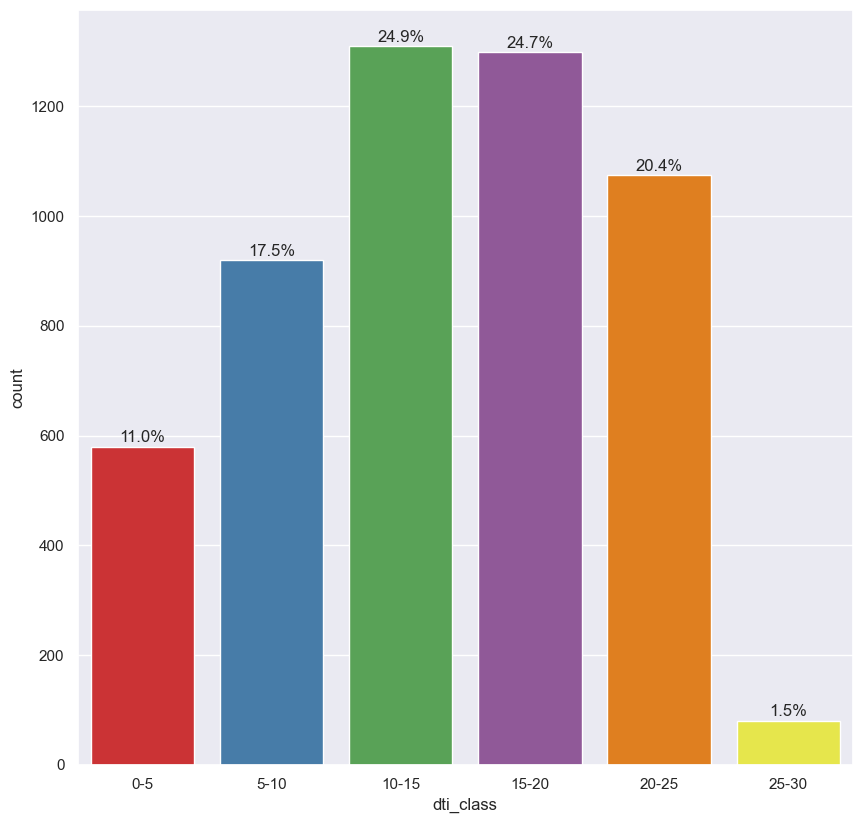

In [93]:
filter4 = loan[loan['loan_status']=='Charged Off']
filter5 = loan[loan['loan_status']!='Charged Off']


plt.figure(figsize=(10,10))
ax = sns.countplot(data=filter4, x='dti_class', palette='Set1')
for bars in ax.containers:
    for p in bars.patches:
       
        percentage = f'{100 * p.get_height() / filter4.shape[0]:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

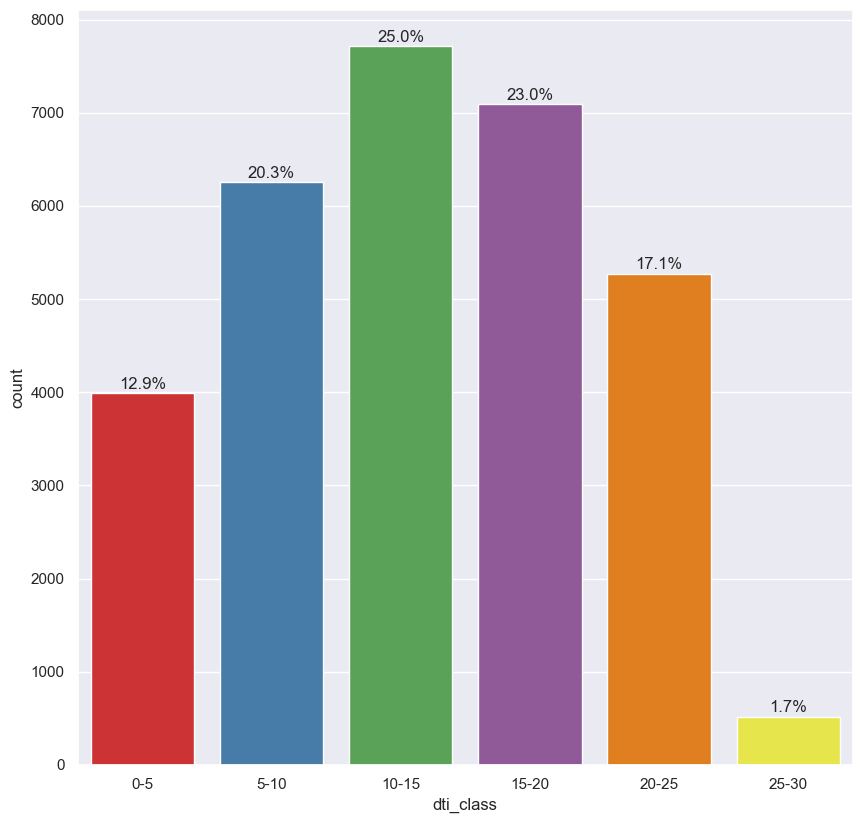

In [94]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data=filter5, x='dti_class', palette='Set1')
for bars in ax.containers:
    for p in bars.patches:
       
        percentage = f'{100 * p.get_height() / filter5.shape[0]:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

60% of those that default have a dti of between 10-25% while the fully paid 60% have a dti between 5-20%

This indicates that higher dtis are more likely to default that lower ones.

### verification of income and how it impacts loan status

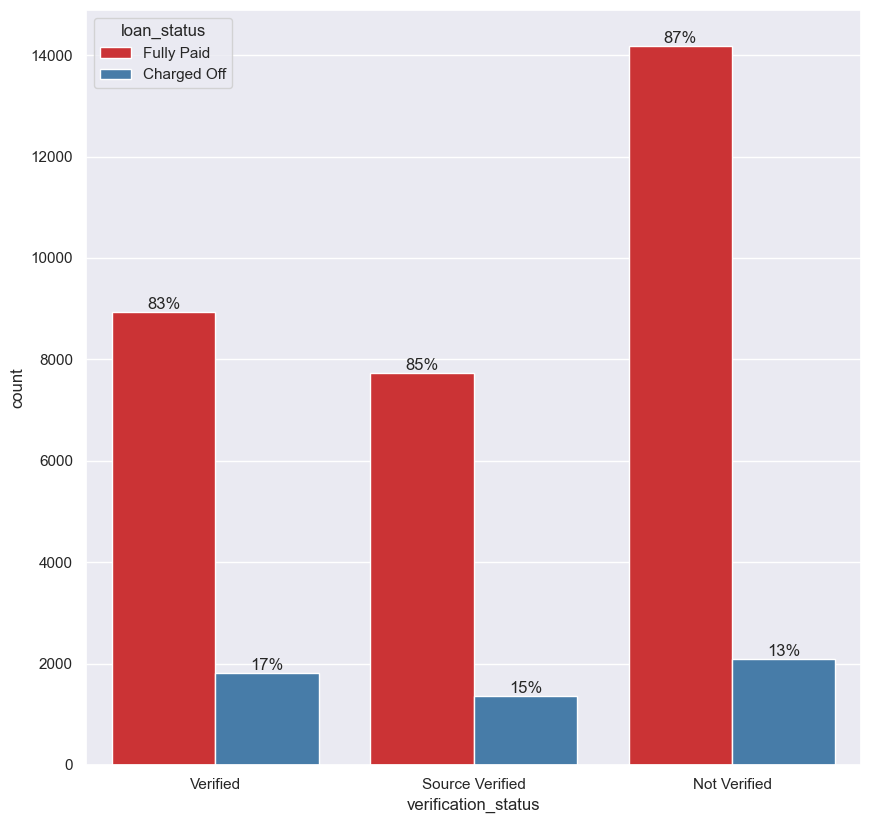

In [95]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data=loan, x='verification_status', hue='loan_status', palette='Set1')
barPerc(loan,'verification_status',ax)
plt.show()

<Figure size 1000x1000 with 0 Axes>

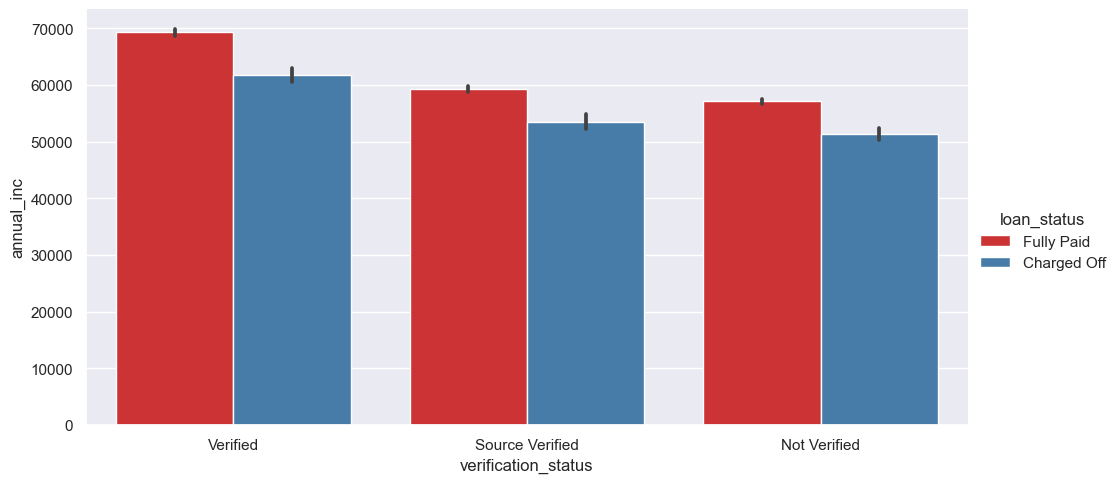

In [96]:
plt.figure(figsize=(10,10))
sns.catplot(data = loan, y='annual_inc', x='verification_status', hue='loan_status', kind='bar', palette='Set1',aspect = 2)

plt.show()

Verification status of employment income does not have much impact on a client's ability to repay their loan. In fact, unverfiied has a charge off % of 13 while verified is 17%.
Though, income verfication shows a trend in the amount of annual income. Verified income over 60K tends to pay back more, source verified above 55K paying more more often and the same for not verified. implying that persons who make more or more capable of repaying their loans.

#### purpose and how it impacts repayment

In [97]:
purpose_pivot = loan.pivot_table(index='purpose', columns='loan_status',values='loan_amnt', aggfunc='count')
purpose_pivot['Default_%'] = round((purpose_pivot['Charged Off']/(purpose_pivot['Charged Off'] +
                                                                  purpose_pivot['Fully Paid']))*100,2)
purpose_pivot.sort_values(by='Default_%', ascending=False, inplace=True)
purpose_pivot

loan_status,Charged Off,Fully Paid,Default_%
purpose,,,
small_business,425,1138,27.19
renewable_energy,18,76,19.15
educational,54,258,17.31
moving,90,459,16.39
other,599,3074,16.31
house,53,278,16.01
medical,102,536,15.99
debt_consolidation,2585,14395,15.22
vacation,52,313,14.25


<Figure size 1000x1000 with 0 Axes>

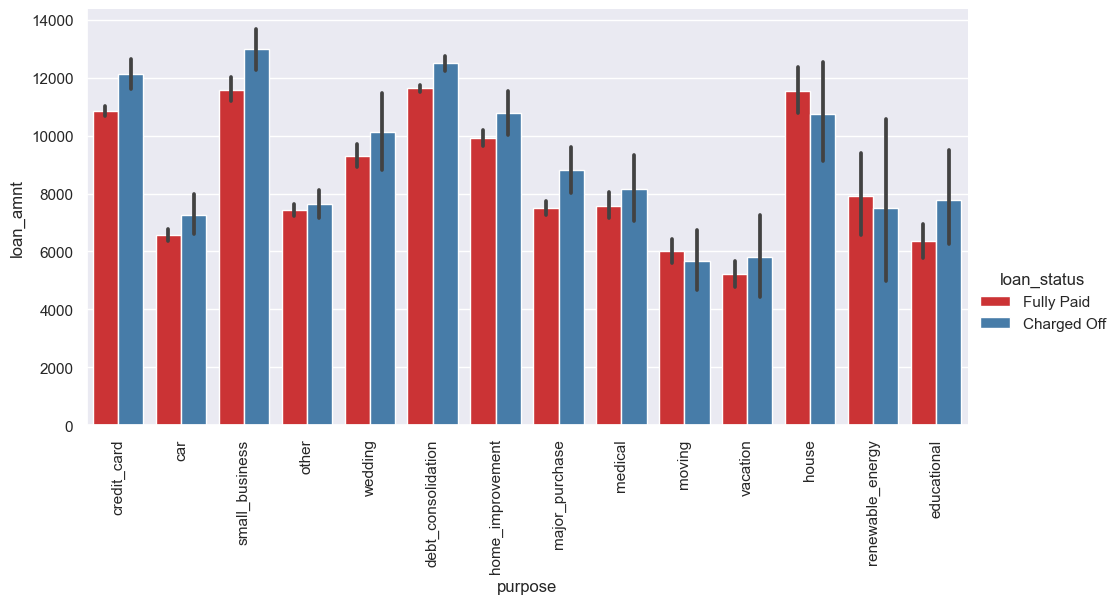

In [98]:
plt.figure(figsize=(10,10))
sns.catplot(data = loan, y='loan_amnt', x='purpose', hue='loan_status', kind='bar', palette='Set1',aspect = 2)
plt.xticks(rotation=90)
plt.show()

Small business loans are the most risky purpose at 27% followed by renewable energy loans.
When the loan amount is taken into consdieration, loans for debt consolodation, education,renewable energy, major purchases, small business and credit cards carry significant risk especially if those applicants are requesting larger sums. Thus it would be best to lower the amount lent for particular purposes to lower the risk of default 

<AxesSubplot:xlabel='issue_d', ylabel='count'>

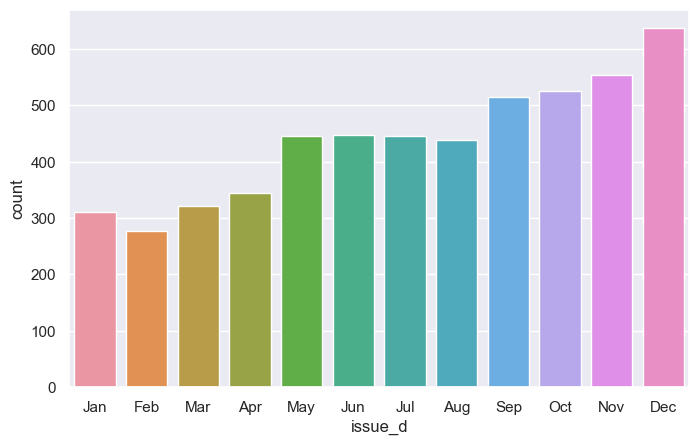

In [101]:
issue_d_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=filter4, x='issue_d', order = issue_d_order)

<AxesSubplot:xlabel='issue_d', ylabel='loan_amnt'>

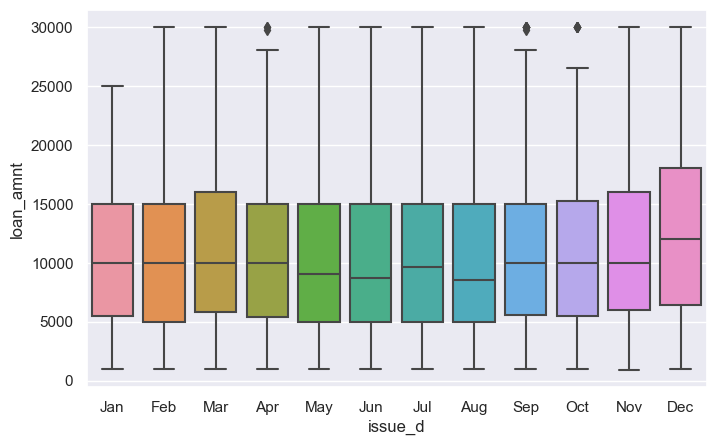

In [105]:
sns.boxplot(data=filter4, x='issue_d', y='loan_amnt', order = issue_d_order)

Dec has the hiest rate of probability of default of the months reported. Additionally, the median loan amount for december is also the highest for the entire year. This indicates that borrowers takign a loan out in Dec for a higher amount has a higher probability of default

## <font color='red'>  Final Observations </font>

- int rate has a significant impact on the repayment of loans. As interest rate increases, so does the proabbility of default. 
  for loans termed 36 months, rates over 11% have more defaulters and for 60 month loans, rates over 14% result in more    defaults. 
  
- annual_class - as the income increased the percentage of defaulters decreased going from 18% to 10% in the highest class
  
- grade of the loan also has an impact on the loan repayment. Clients with lower gradse loans have a higher probability to default. with 35% of grade G defaulting while opnly 6% of grade A do. 

- loan_amnt has an impact on the default probabilty as well. In all cases, the larger the sum of money requested for the loan, the higher the chances of default. Even with higher annual income, the rate of number of defaults is still high.

- emp_length_years persons with less than 1 year of employment pay their loans back more frequently than those of 10 or more years. This may be tied to the fact that length of employment is inversely proportion to the loan amount. Therefore a person with a fewer years of employment requesting a smaller sum is less risky

- addr_state - the location of an applicant increases the probability of default with States of  'NV', 'SD', 'AK', 'FL', 'HI', 'MO', 'NM', 'OR', 'CA', 'NJ', 'GA', 'MD','WA', 'NC', 'NH' having default rates of 15% or more. Therefore consideration for the location of the applicant should be taken

- home_ownership, while rent, own and mortgage all fail to repay more than pay their ratios remain similar. However, those who are classed as other did not replay their loans nearly 60% of the time. Therefore, not having a fixed address is a possible sign of a future default in a client

- pub_rec_bankruptcies, as the number of public bankrupcies increases so does the proabbility of default with clients with at least one bankruptcy failing to repay their loan at least 22% of the time compared to 14% of the time with 0 bankruptcies

- issue_d - clients taking out loans at the end of the year have a higher default rate than those withdrawing in earlierr months. December loans also have the highest median loan amounts. As noted earlier higher loan values are linked to higher default risk

- purpose - loans for small business and renewable energy have high rates of default 20+%. Indicating that loans for thus purpose should be restricted. Additionally when we consider the loan amount requested, then higher amounts for  debt consolodation, education,renewable energy, major purchases, small business and credit cards carry an increased risk of default.



## <font color='red'>  Conclusions </font>

The biggest indicator of default is the amount being requested by the client. Higher loan_amnts always result in higher rates of default. This risk is increased with increasing interest rates, lower loan grades, longer terms of employment, address, lack of a fixed address, having at least one bankruptcy in the past and the purpose of the loan being for small business, credit card debt or debt consolodation.

Therefore the following are indicators of increased default risk
- loan amount > 12.3K
- income_class the higher one's income, the less likely they are to default 
- int rate - >11% on a 36 month term loan and >14% on a 60 month term loan
- grade - lower than A with increased risk the lower the grade i.e B risk < G risk
- addr_state - being a resident of  'NV', 'SD', 'AK', 'FL', 'HI', 'MO', 'NM', 'OR', 'CA', 'NJ', 'GA', 'MD','WA', 'NC', 'NH'
- home_ownership - Not renting, owning or paying a mortgage for your home. That is having no fixed address.
- pub_rec > 0
- dti > 10%
- issue_d from Sep to Dec - esp dec are likely holiday loans
- purpose - loan for small business regardless of loan amount, and with higher loan amounts default increases for debt consolodation, education,renewable energy, major purchases and credit cards


